In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("data/glass.csv")

In [5]:
df.shape

(214, 10)

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [7]:
df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

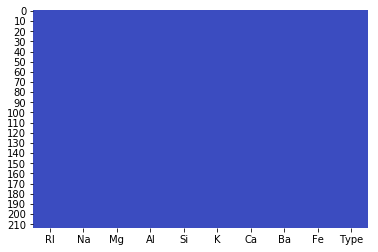

In [10]:
sns.heatmap(df.isnull(),cmap='coolwarm',cbar = False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
df.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


K- min - 0.0 and max - 6.21! big difference. Could explain the outliers.

In [13]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


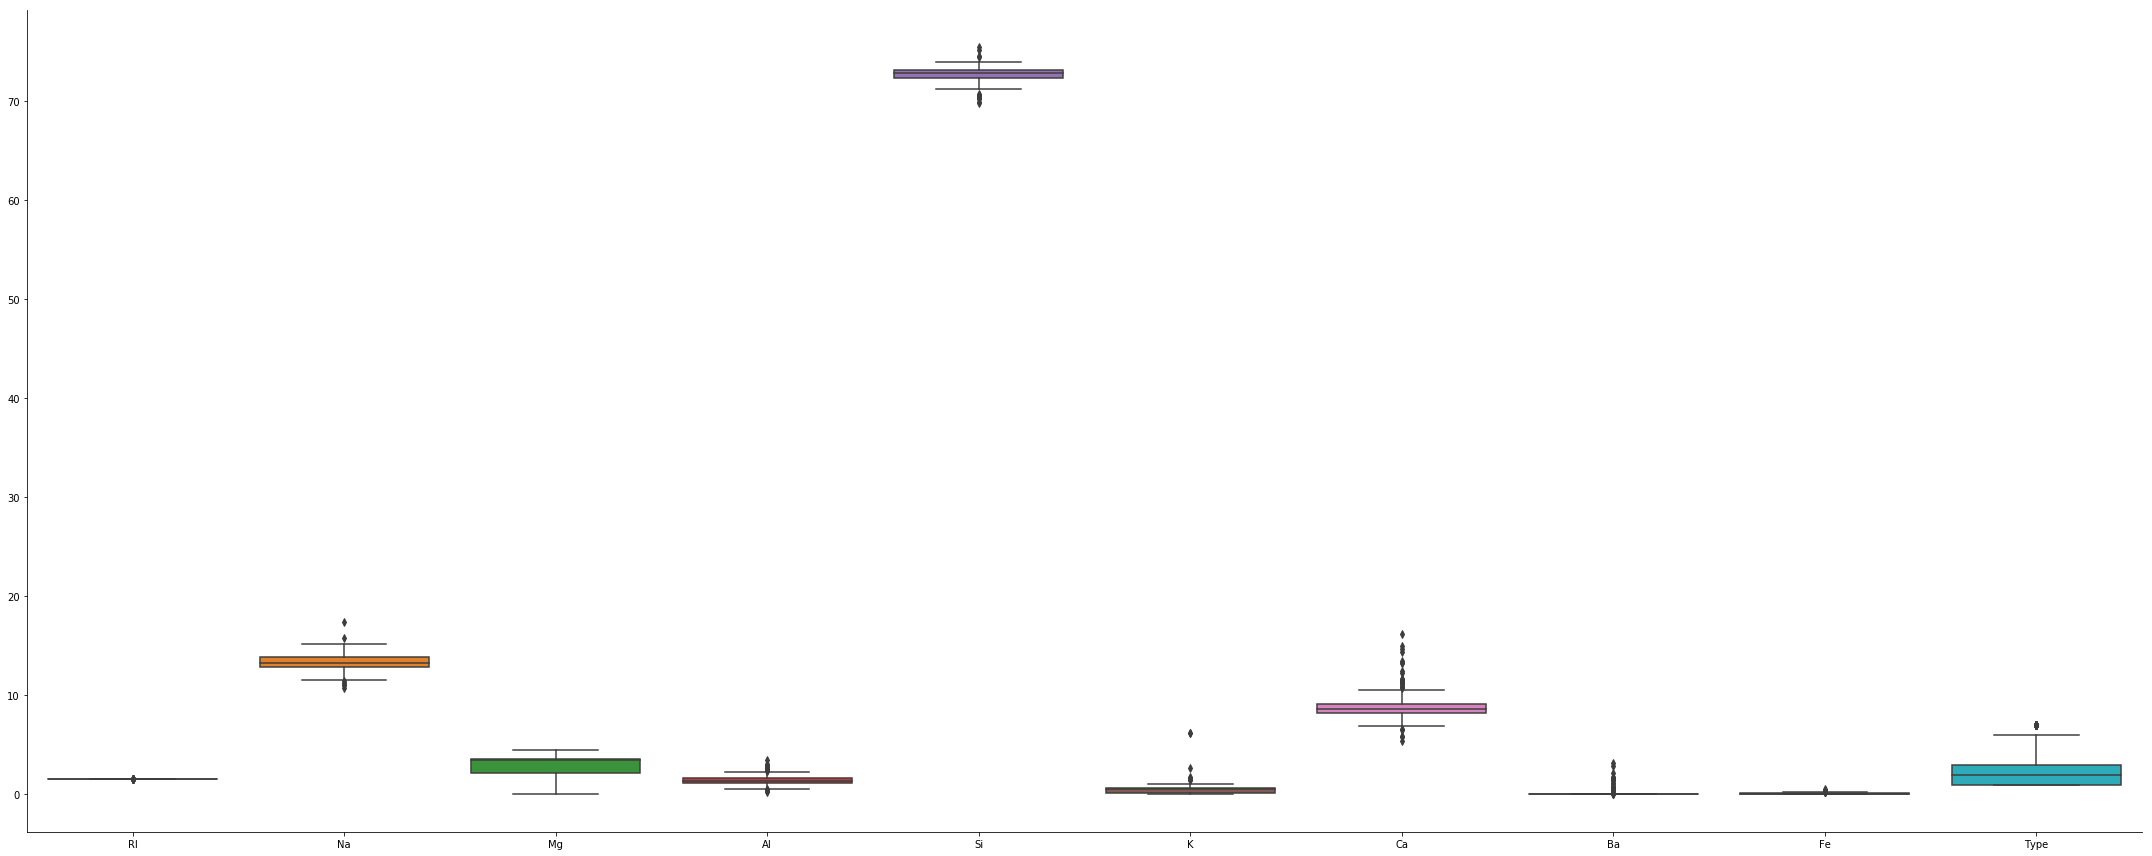

In [14]:
sns.factorplot(data=df,kind='box',size=12,aspect=2.5)

In [31]:
df.groupby(by='Type').count().T

Type,1,2,3,5,6,7
RI,70,66,17,8,8,12
Na,70,66,17,8,8,12
Mg,70,66,17,8,8,12
Al,70,66,17,8,8,12
Si,70,66,17,8,8,12
K,70,66,17,8,8,12
Ca,70,66,17,8,8,12
Ba,70,66,17,8,8,12
Fe,70,66,17,8,8,12


In [15]:
np.sum(df.duplicated())

1

In [17]:
def plot(feature_x,Type='Type'):
    sns.factorplot(x=Type,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=Type,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=Type,y=feature_x,data=df,kind='swarm',size=5,aspect=1)

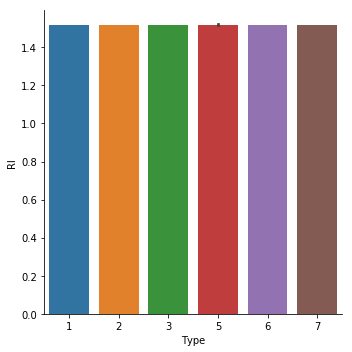

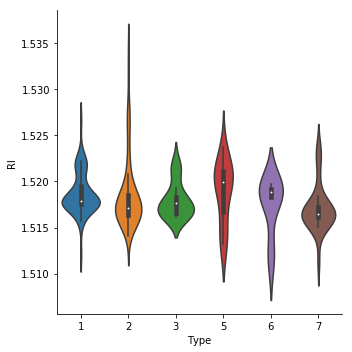

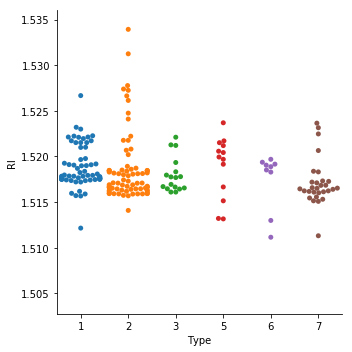

In [20]:
plot('RI','Type')

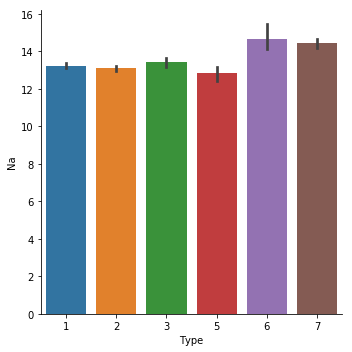

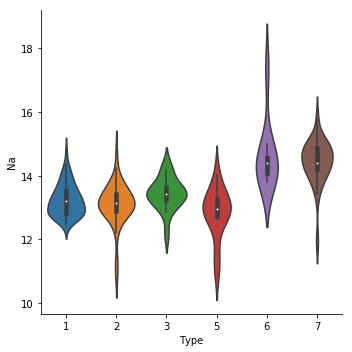

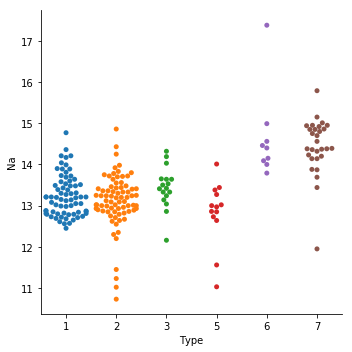

In [21]:
plot('Na','Type')

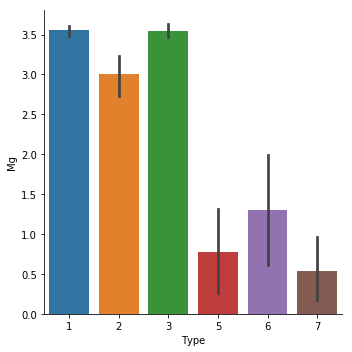

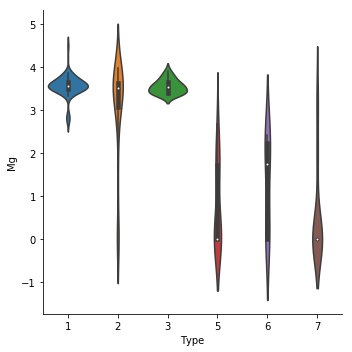

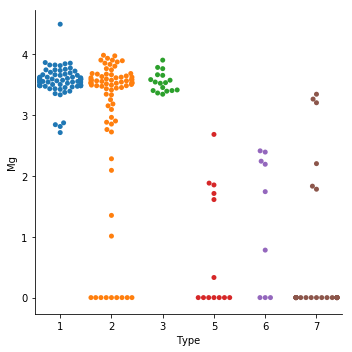

In [22]:
plot('Mg','Type')

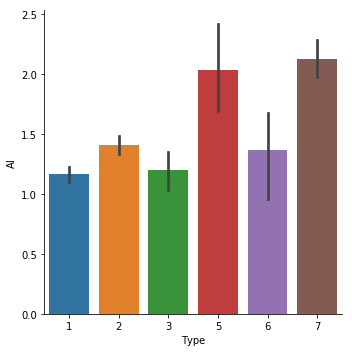

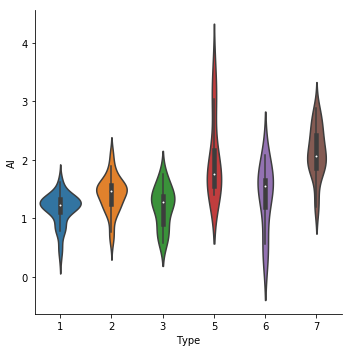

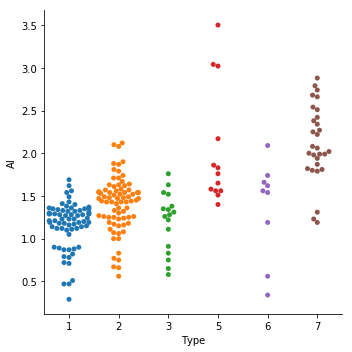

In [23]:
plot('Al',"Type")

In [24]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

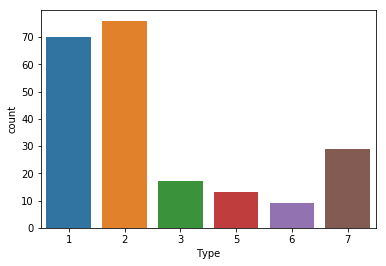

In [25]:
sns.countplot(df["Type"])

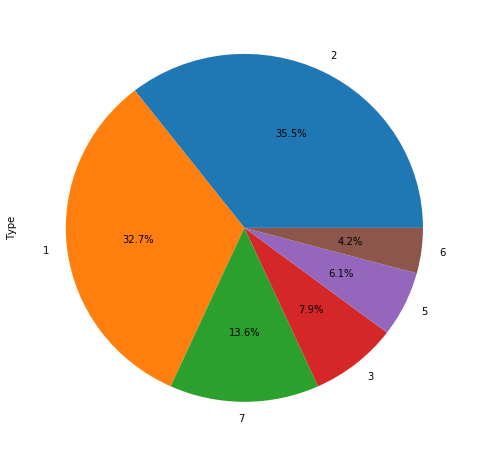

In [26]:
plt.figure(1, figsize=(8,8))
df["Type"].value_counts().plot.pie(autopct="%1.1f%%")

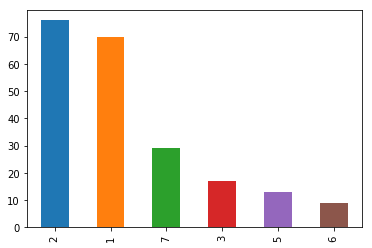

In [6]:
df["Type"].value_counts().plot(kind='bar')

In [9]:
df["Type"].value_counts(sort=True)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [10]:
df["Type"].value_counts(sort=True, normalize=True)

2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: Type, dtype: float64

In [14]:
df["Type"].value_counts()*100/len(df)

2    35.514019
1    32.710280
7    13.551402
3     7.943925
5     6.074766
6     4.205607
Name: Type, dtype: float64

In [27]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(x='Type', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='Type', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='Type',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='Type',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

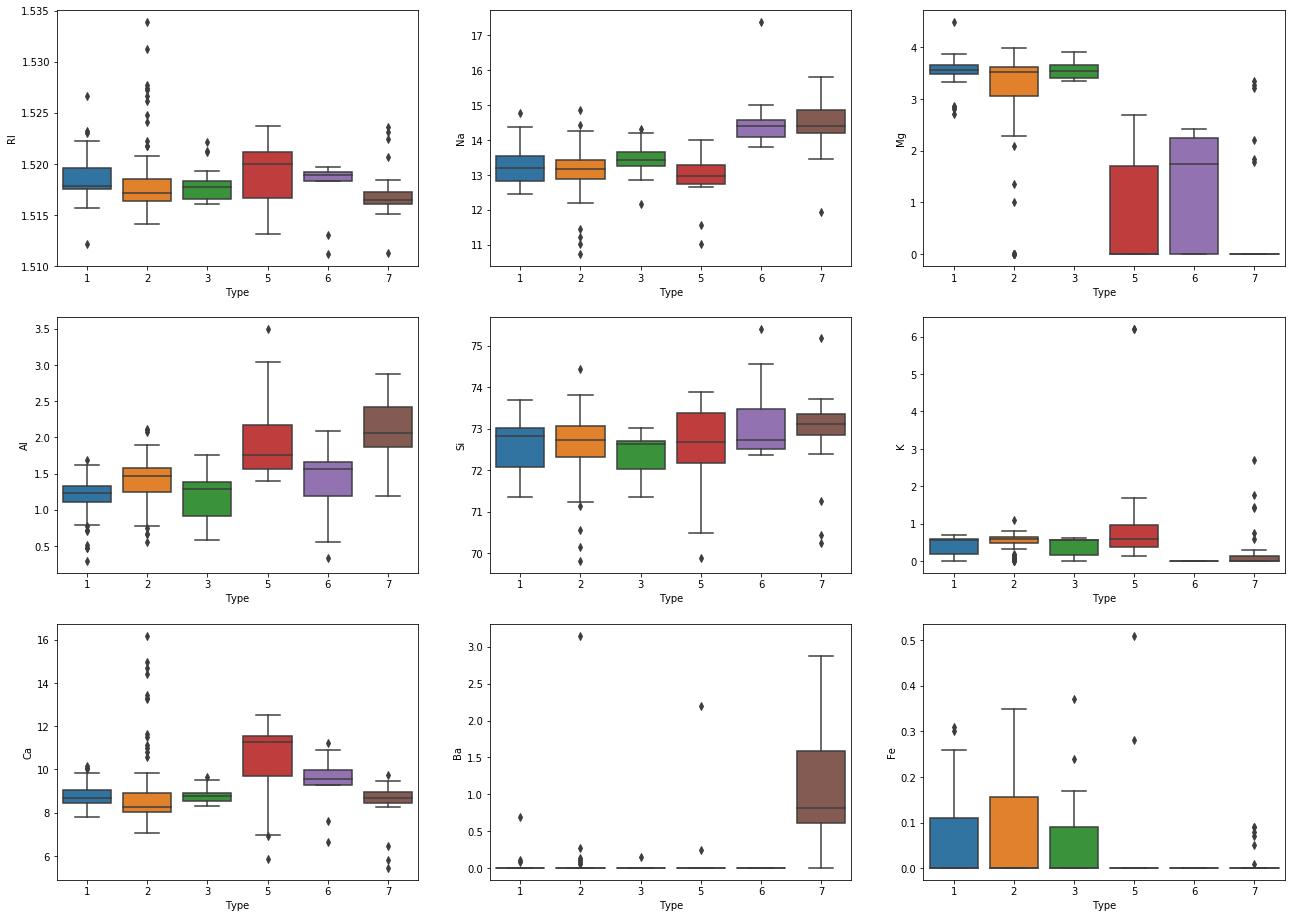

In [30]:
draw_multivarient_plot(df,3,3,"box")

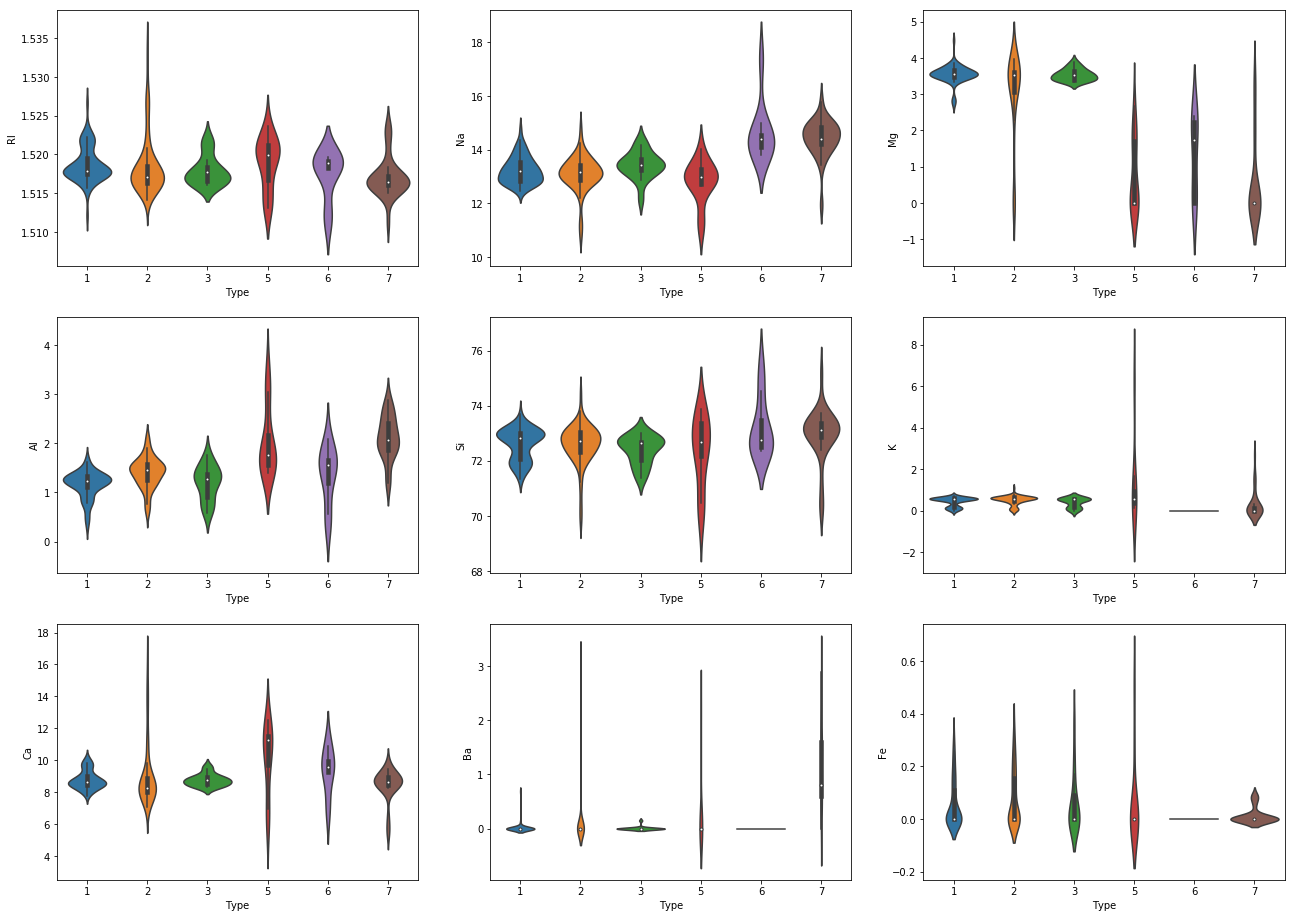

In [31]:
draw_multivarient_plot(df,3,3,"violin")

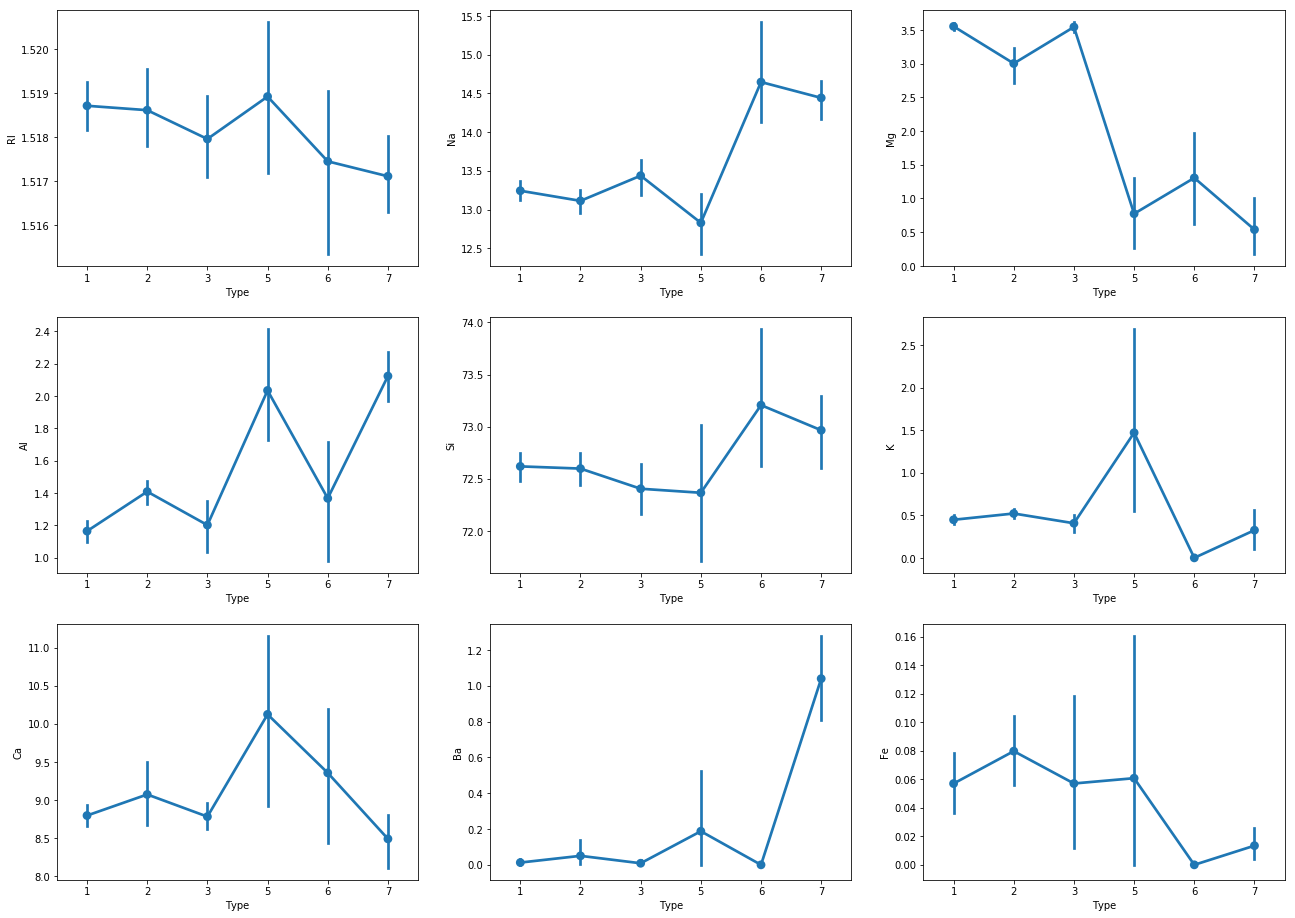

In [32]:
draw_multivarient_plot(df,3,3,"point")

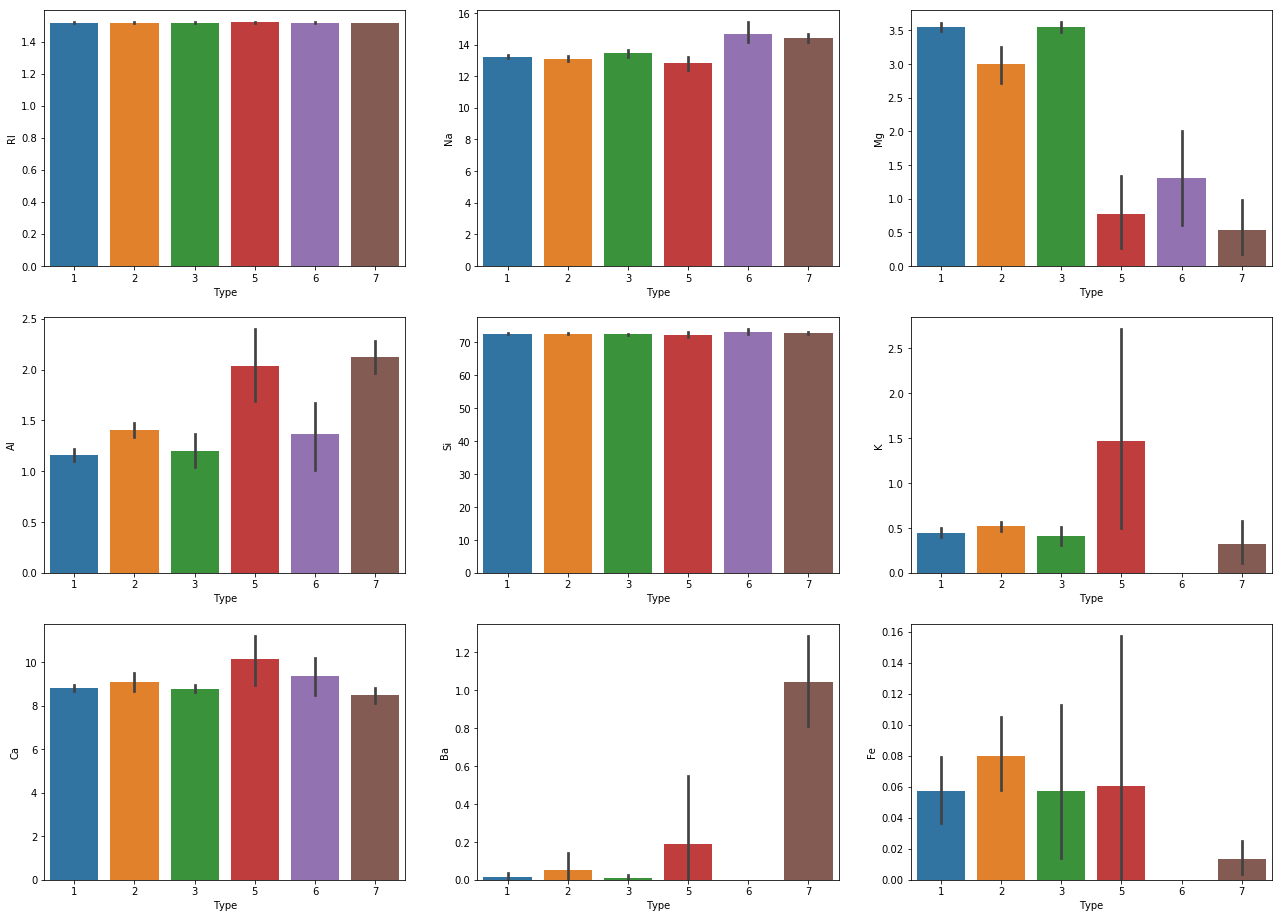

In [33]:
draw_multivarient_plot(df,3,3,"bar")

In [34]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


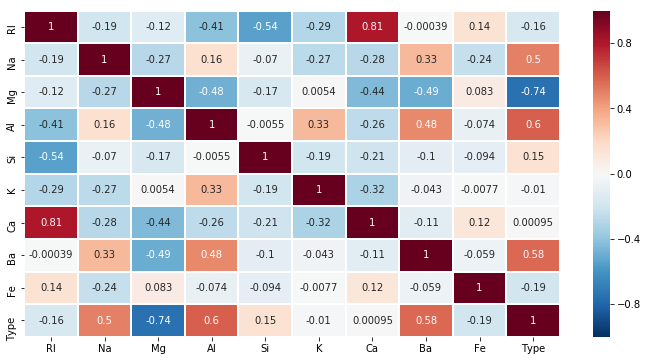

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, linewidths=1,  vmin=-1, cmap="RdBu_r")

In [8]:
correlation = df.corr()
correlation['Type'].sort_values(ascending=False)

Type    1.000000
Al      0.598829
Ba      0.575161
Na      0.502898
Si      0.151565
Ca      0.000952
K      -0.010054
RI     -0.164237
Fe     -0.188278
Mg     -0.744993
Name: Type, dtype: float64

In [5]:
df.corr()['Type'].abs().sort_values(ascending= False)

Type    1.000000
Mg      0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe      0.188278
RI      0.164237
Si      0.151565
K       0.010054
Ca      0.000952
Name: Type, dtype: float64

Text(0.5,1,'Al and Glass Type')

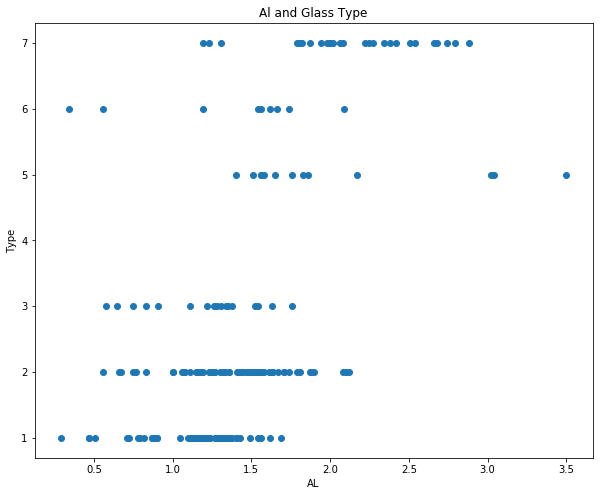

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(df['Al'],df['Type'])
plt.xlabel('AL')             
plt.ylabel('Type')
plt.title('Al and Glass Type') 

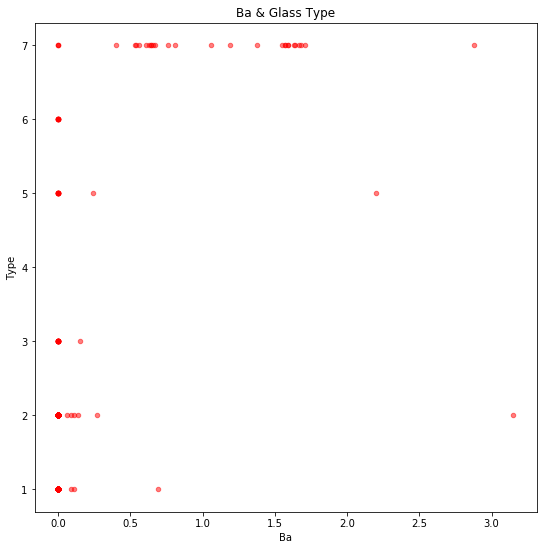

In [38]:
df.plot(kind='scatter', x='Ba', y='Type',alpha = 0.5,color = 'red', figsize=(9,9))
plt.xlabel('Ba')             
plt.ylabel('Type')
plt.title('Ba & Glass Type')        
plt.show()

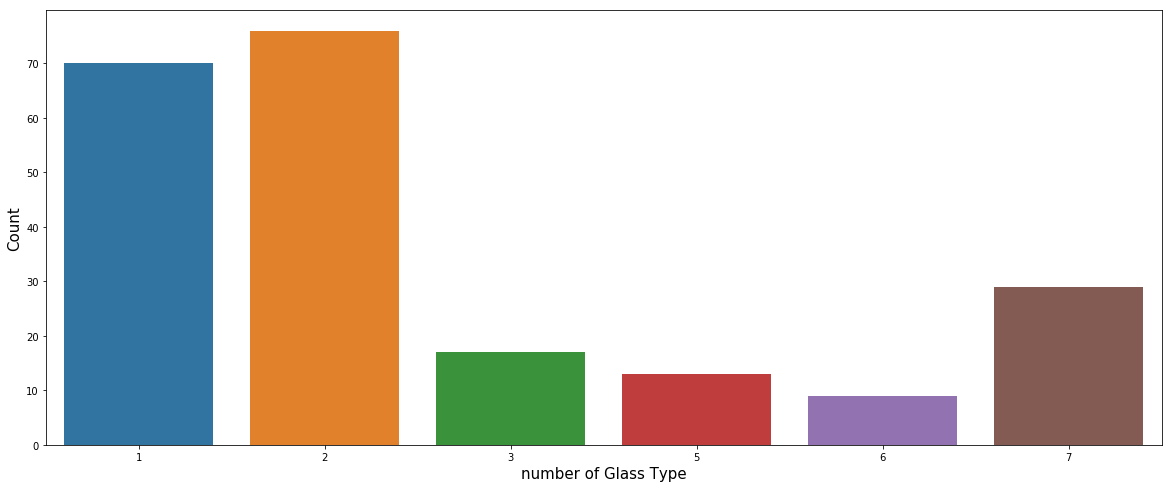

In [39]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Type'].round(2))
plt.xlabel('number of Glass Type').set_size(15)
plt.ylabel('Count').set_size(15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C328F7908>,
      dtype=object)

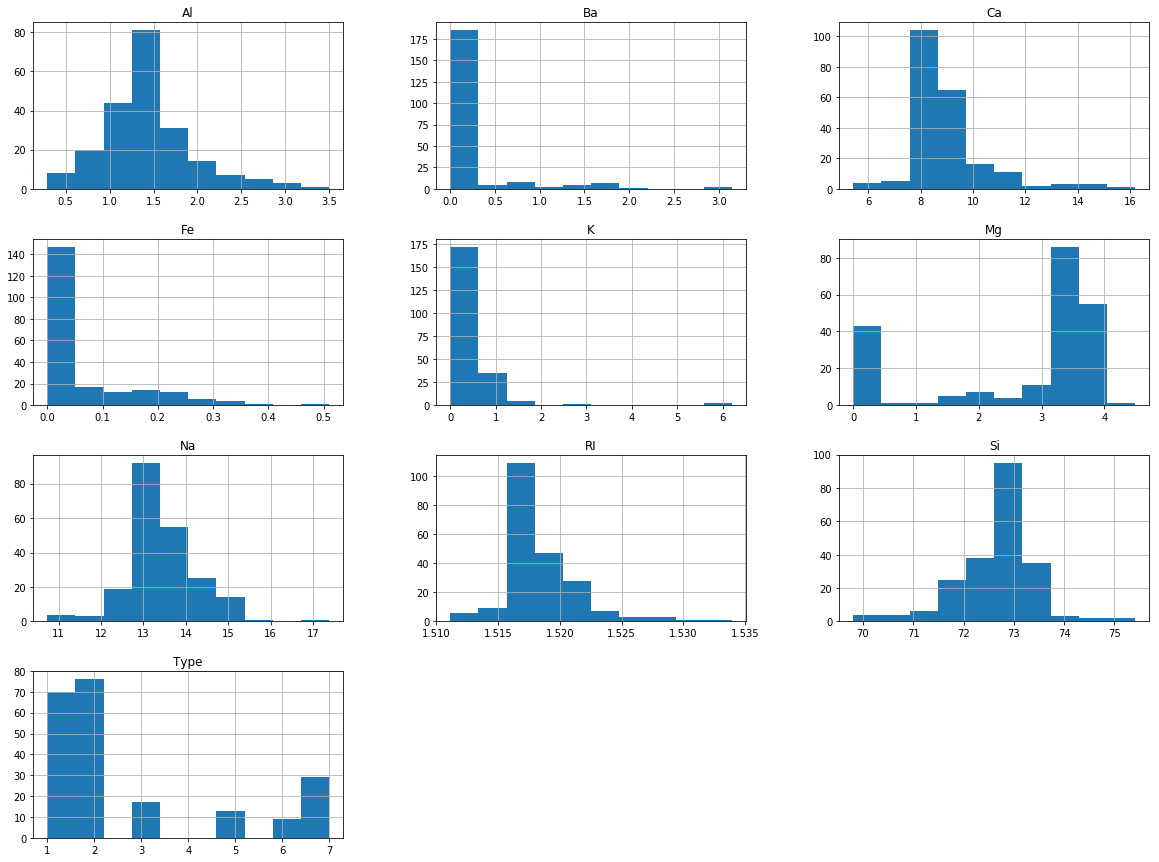

In [40]:
df.hist(figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C3415C278>,
      dtype=object)

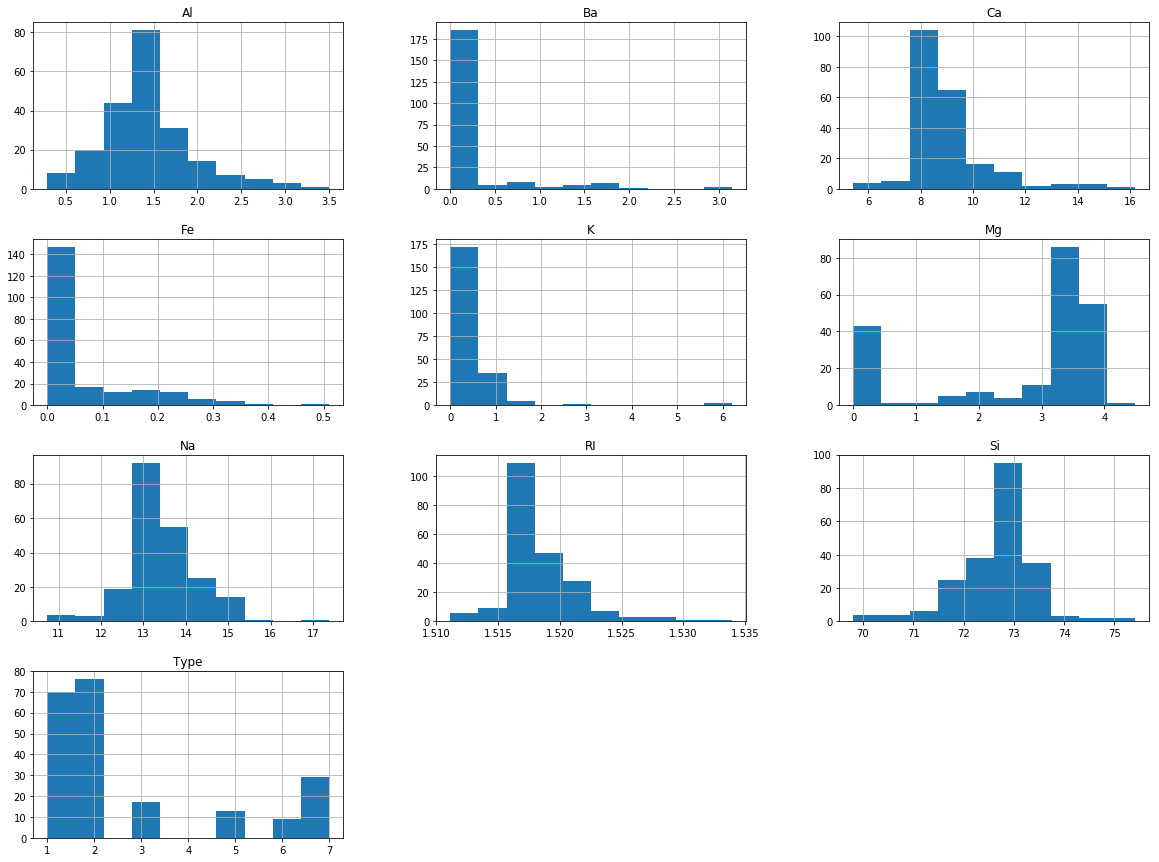

In [41]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))

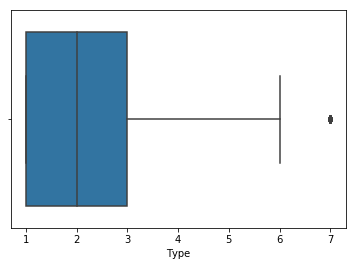

In [42]:
sns.boxplot(x='Type',data=df, orient='h')

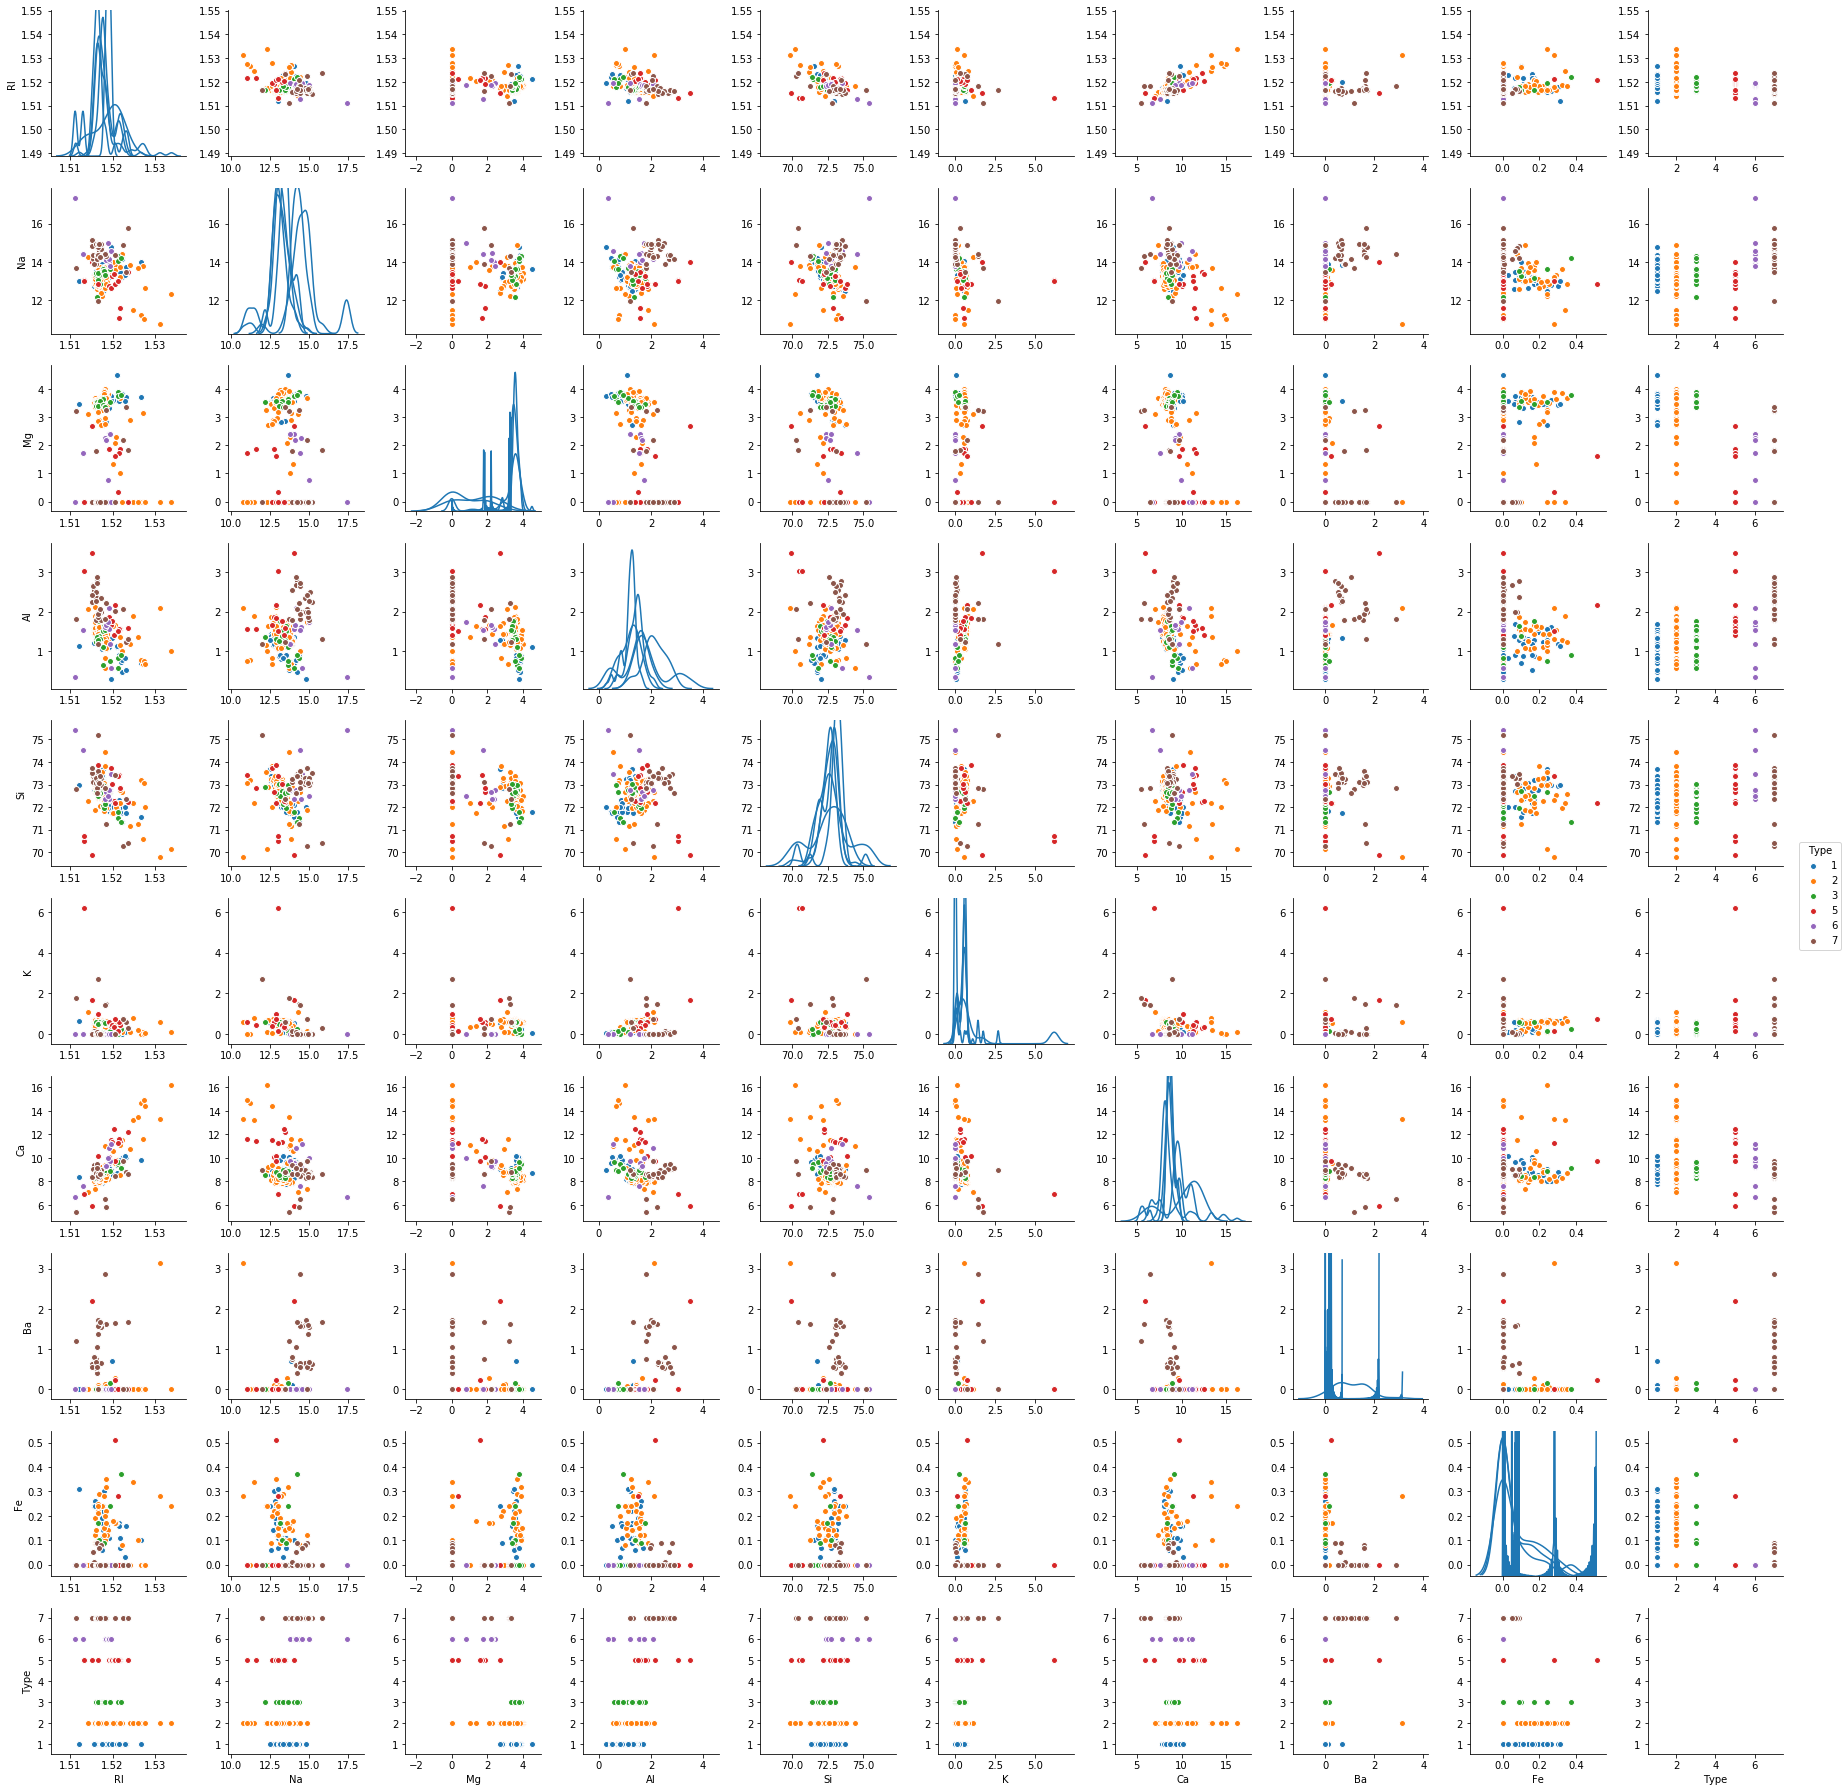

In [43]:
sns.pairplot(df, hue="Type",diag_kind="kde")

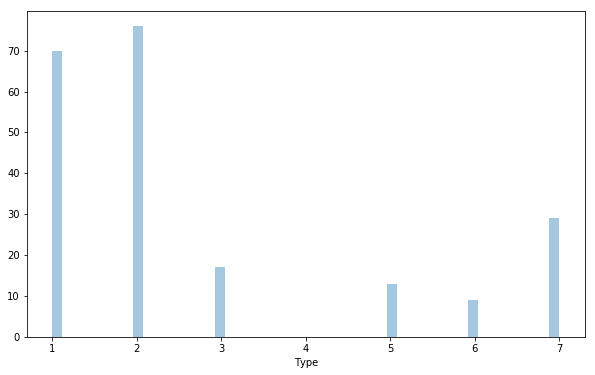

In [45]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(df['Type'],kde=False,bins=50)

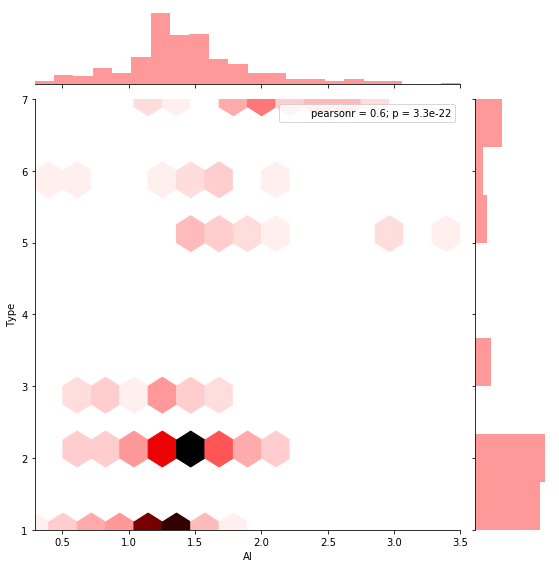

In [44]:
sns.jointplot(x='Al', y='Type', data=df, kind='hex', color='red', size=8)

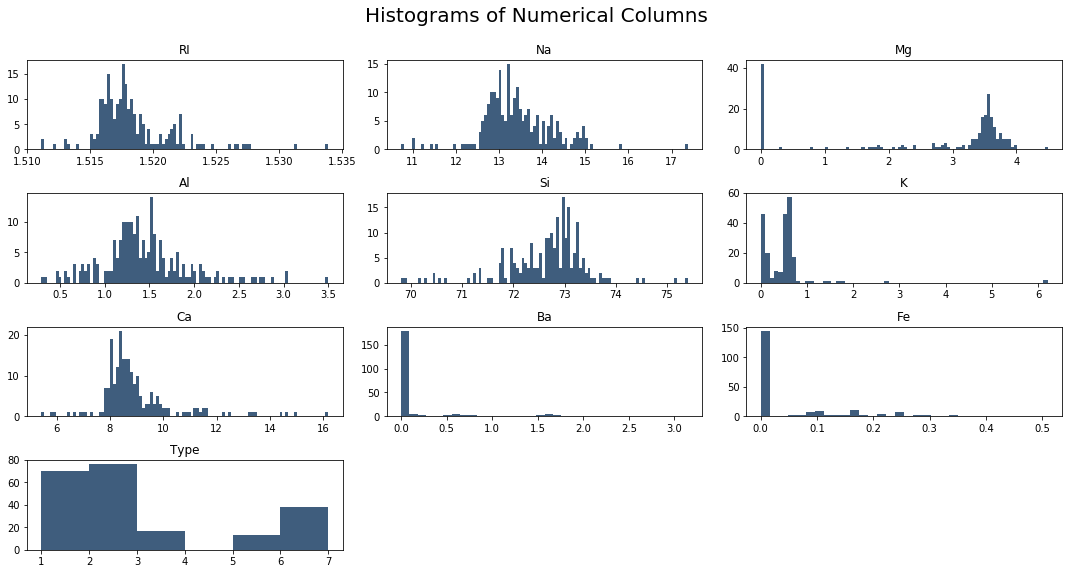

In [46]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df.iloc[:, i], bins=vals, color='#3F5D7D')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

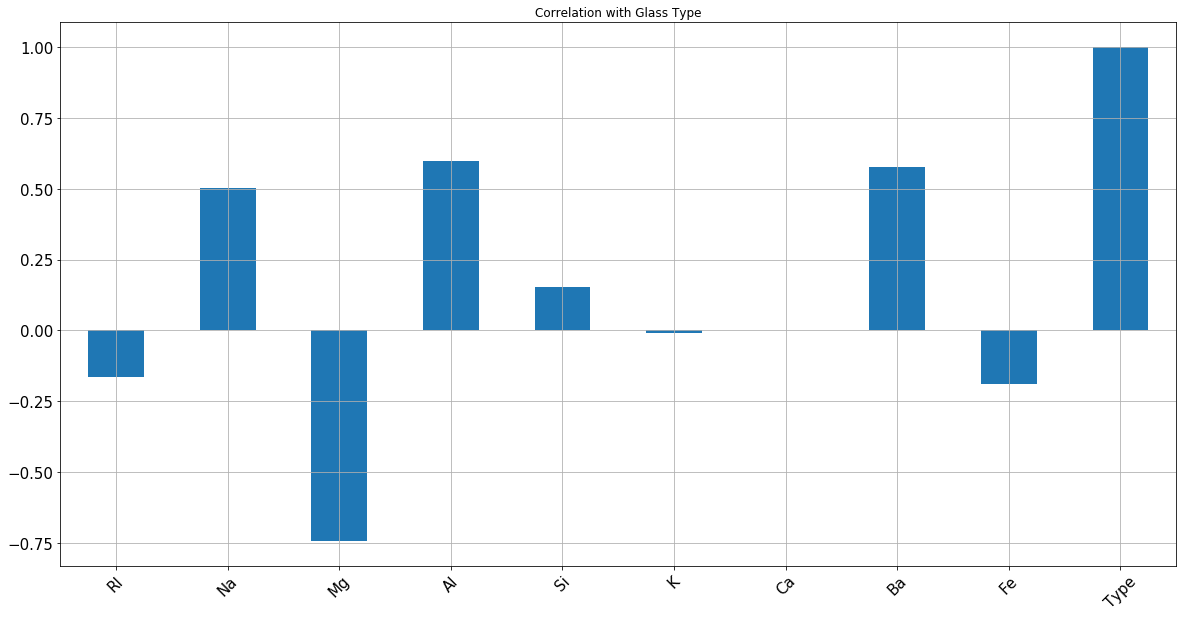

In [47]:
df.corrwith(df.Type).plot.bar(
        figsize = (20, 10), title = "Correlation with Glass Type", fontsize = 15, rot = 45, grid = True)

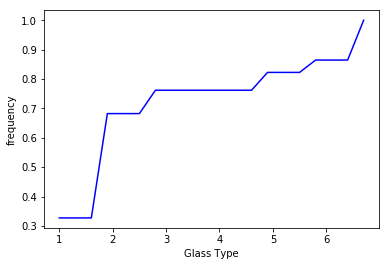

In [48]:
values, base = np.histogram(df['Type'], bins=20)
kumulativ = np.cumsum(values/df.shape[0])
plt.plot(base[:-1], kumulativ, c='blue')
plt.xlabel('Glass Type')
plt.ylabel('frequency')
plt.show()

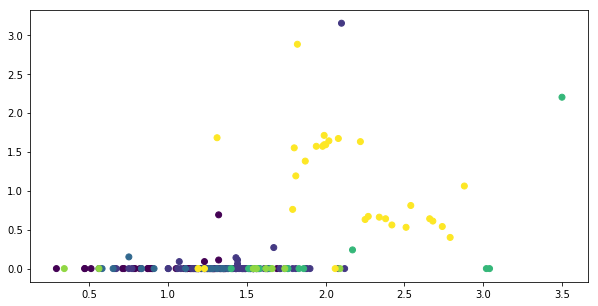

In [50]:
plt.figure(figsize=(10,5))

plt.scatter(x='Al', y='Ba', c='Type', data=df)
# plt.legend()

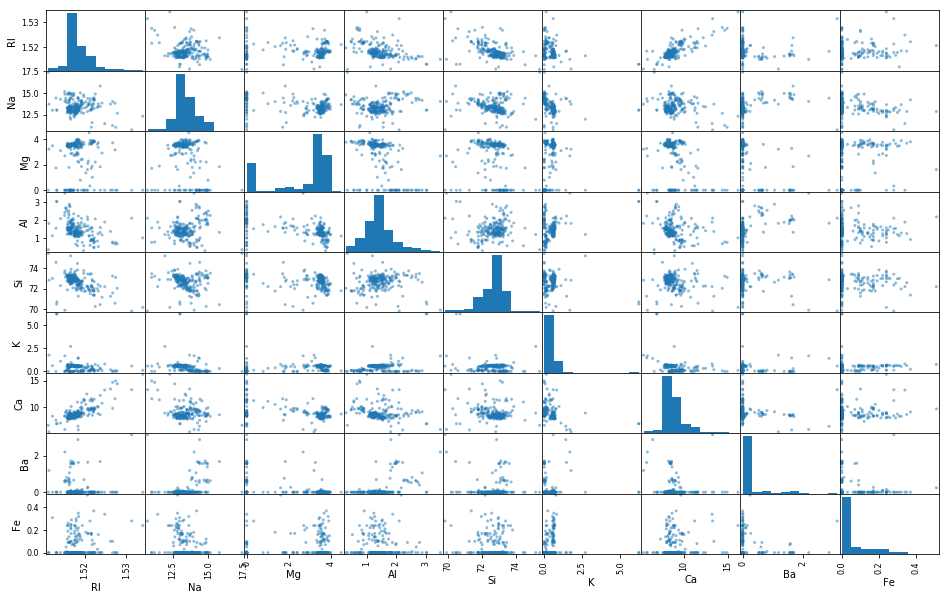

In [51]:
from pandas.plotting import scatter_matrix

attributes = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
scatter_matrix(df[attributes], figsize=(16, 10));

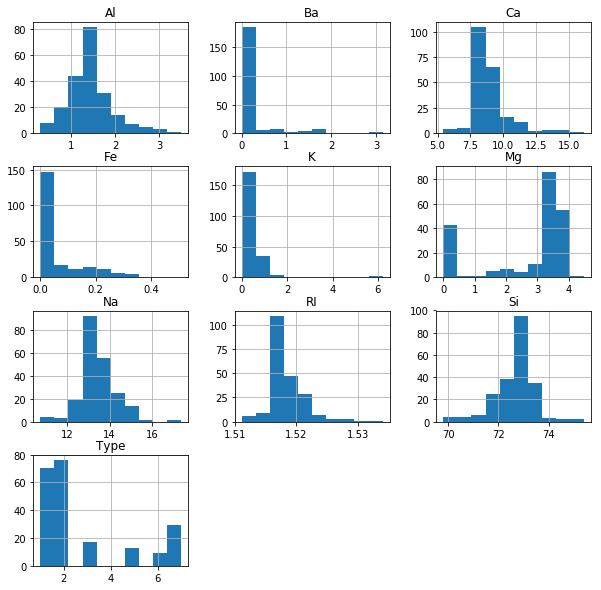

In [56]:
df.hist(figsize=(10,10));

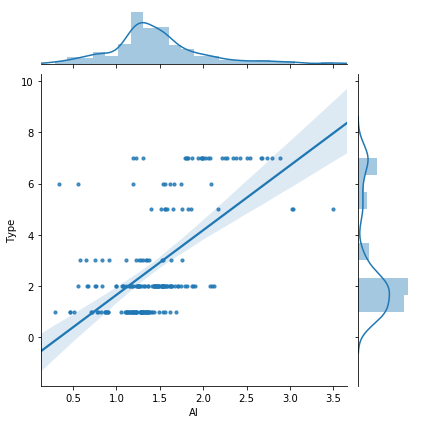

In [57]:
new_df = df[['Al', 'Type']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="Al", y="Type", data=new_df, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

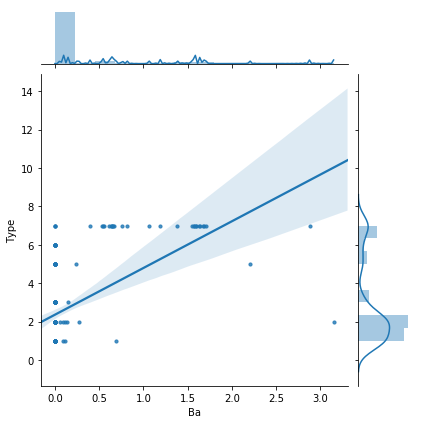

In [55]:
new_df = df[['Ba', 'Type']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="Ba", y="Type", data=new_df, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

shape of cov=(9, 9)


,L1,L2,L3,L4,L5,L6,L7,L8,L9
RI,-0.545177,0.285683,0.086911,-0.147381,0.073543,-0.115288,-0.081867,-0.752216,0.025732
Na,0.258126,0.270350,-0.384920,-0.491242,-0.153683,0.558118,-0.148580,-0.127693,-0.311937
Mg,-0.110881,-0.593558,0.008418,-0.378786,-0.123509,-0.308186,0.206045,-0.076891,-0.577273
Al,0.428709,0.295212,0.329237,0.137506,-0.014109,0.018857,0.699236,-0.274441,-0.192227
Si,0.228836,-0.155099,-0.458709,0.652538,-0.008500,-0.086098,-0.216067,-0.379923,-0.298073
K,0.219344,-0.153970,0.662574,0.038535,0.307040,0.243632,-0.504121,-0.109812,-0.260509
Ca,-0.492306,0.345380,-0.000985,0.276443,0.188188,0.148669,0.099135,0.398705,-0.579323
Ba,0.250375,0.484702,0.074055,-0.133175,-0.251334,-0.657219,-0.351783,0.144932,-0.198228
Fe,-0.185842,-0.062039,0.284451,0.230492,-0.873264,0.243044,-0.073721,-0.016271,-0.014669


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.151140,-0.529488,-0.372096,-1.728901,0.251936,-0.340210,0.395600,-0.197160,0.016346
1,0.574137,-0.759788,-0.556708,-0.760232,0.257071,0.115960,0.024158,-0.284214,-0.010790
2,0.940160,-0.929836,-0.554907,-0.206254,0.237506,-0.126630,0.367518,-0.095941,0.021640
3,0.142083,-0.961677,-0.117125,-0.415724,0.476299,-0.285805,0.052497,-0.002959,0.092035
4,0.351092,-1.091249,-0.485079,-0.069102,0.432090,-0.298032,-0.158570,-0.191316,0.002315


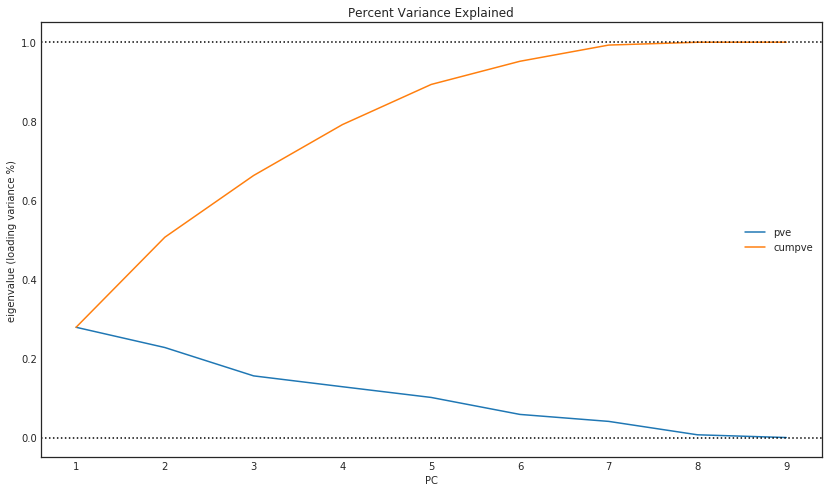

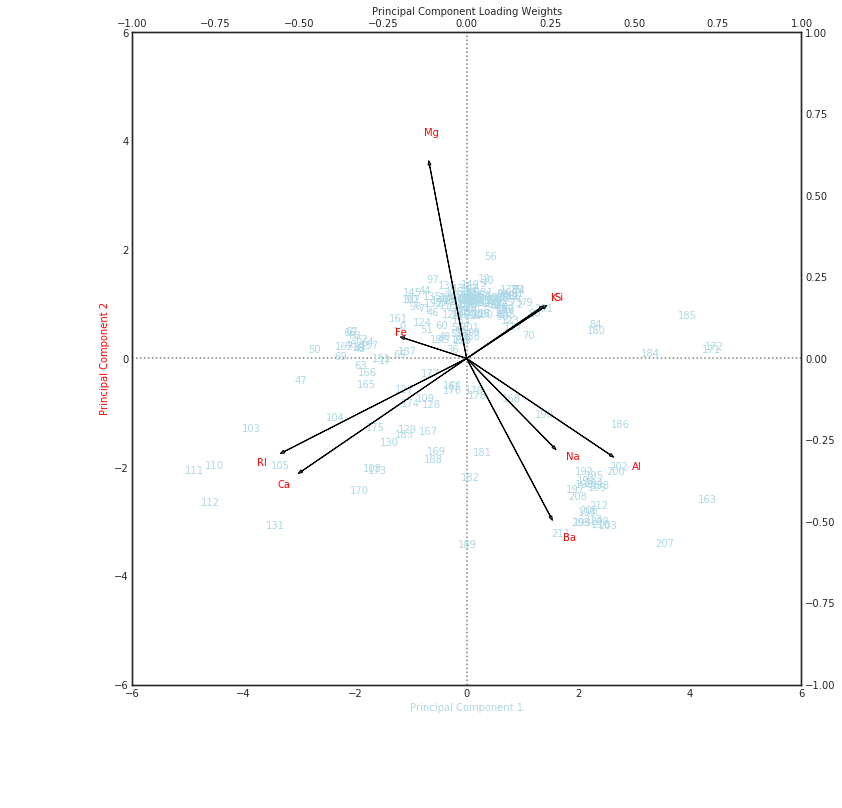

In [58]:
# Principal Component Analysis to find most important features
X = df.drop('Type',axis=1)
X
# step 1: center and normalize features 
C = (X-np.mean(X))/np.std(X)
C
# step 2: compute covariance matrix of centered features
V = np.cov(C.T)
V
print('shape of cov={}'.format(V.shape))
# step 3: compute PC loadings (directions in feature space which have most variation)
eigvals,eigvecs = np.linalg.eig(V)
# enforce descending variance (eigenvalues)
ix = eigvals.argsort()[::-1] 
eigvals,eigvecs = eigvals[ix],eigvecs[:,ix]
loadingsheader = ['L'+str(i) for i in range(1,len(X.columns)+1)]
loadingsdf = pd.DataFrame(eigvecs,columns=loadingsheader,index=X.columns)
display(loadingsdf)
# step 4: compute PCs (i.e. scores: project features X onto loading vectors)
scores = loadingsdf.values.T.dot(C.T)
scoresheader = ['PC'+str(i) for i in range(1,len(C.columns)+1)]
scoresdf = pd.DataFrame(scores.T,columns=scoresheader,index=C.index)
display(scoresdf.head())
def screeplot(eigvals):
    '''
    function which computes percent variance explained plot
    eigvals   : eigenvalues returned by PCA
    '''
    with plt.style.context('seaborn-white'):
        f,ax=plt.subplots(figsize=(14,8))
        x = np.arange(1,len(eigvals)+1,1)
        ax.set_xticks(x)
        totalvar = eigvals.sum()
        pve = eigvals/totalvar
        cumpve = np.cumsum(pve)
        ax.plot(x,pve,label='pve')
        ax.plot(x,cumpve,label='cumpve')
        ax.set(title='Percent Variance Explained',xlabel='PC',ylabel='eigenvalue (loading variance %)')
        ax.axhline(y=0,color='k',linestyle='dotted')
        ax.axhline(y=1,color='k',linestyle='dotted')
        ax.legend(loc='best')

def biplot(loadingdf,scoredf,loadcolor='',scorecolor='',load_axlim=7,score_axlim=7,load_arrows=4):
    '''
    functon which plots first two PCs
    loadingdf        : loading vectors, DataFrame
    scoredf          : score vectors, DataFrame
    load,score_color : color of loadings,scores,str
    load,score_axlim : scale of loading,score axes, flt
    load_arrows      : size of loading arrow heads, flt
    '''
    with plt.style.context('seaborn-white'):
        f = plt.figure(figsize=(12,12))
        ax0 = plt.subplot(111)
        for ix in scoredf.index:
            # scatter scores onto 2d surface
            ax0.annotate(ix,(scoredf['PC1'][ix],-scoredf['PC2'][ix]),ha='center',color=scorecolor)
        ax0.set(xlim=(-score_axlim,score_axlim),ylim=(-score_axlim,score_axlim))
        ax0.set_xlabel('Principal Component 1',color=scorecolor)
        ax0.set_ylabel('Principal Component 2',color=loadcolor)
        # add ref line sthrough origin
        ax0.hlines(y=0,xmin=-score_axlim,xmax=score_axlim,linestyle='dotted',color='grey')
        ax0.vlines(x=0,ymin=-score_axlim,ymax=score_axlim,linestyle='dotted',color='grey')
        # overlay first two loading vector weights
        ax1 = ax0.twinx().twiny()
        ax1.set(xlim=(-load_axlim,load_axlim),ylim=(-load_axlim,load_axlim))
        ax1.tick_params(axis='y',color='red')
        ax1.set_xlabel('Principal Component Loading Weights')
        offset_scalar = 1.15
        for feature in loadingdf.index:
            ax1.annotate(feature,(loadingdf['L1'].loc[feature]*offset_scalar,-loadingdf['L2'].loc[feature]*offset_scalar),color=loadcolor)
        # display PCs as arrows
        for i in range(0,load_arrows):
            ax1.arrow(x=0,y=0,dx=loadingdf['L1'][i],dy=-loadingdf['L2'][i],head_width=0.009,shape='full')
screeplot(eigvals)
biplot(loadingsdf,scoresdf,loadcolor='red',scorecolor='lightblue',load_axlim=1,score_axlim=6,load_arrows=len(loadingsdf.columns))

In [19]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

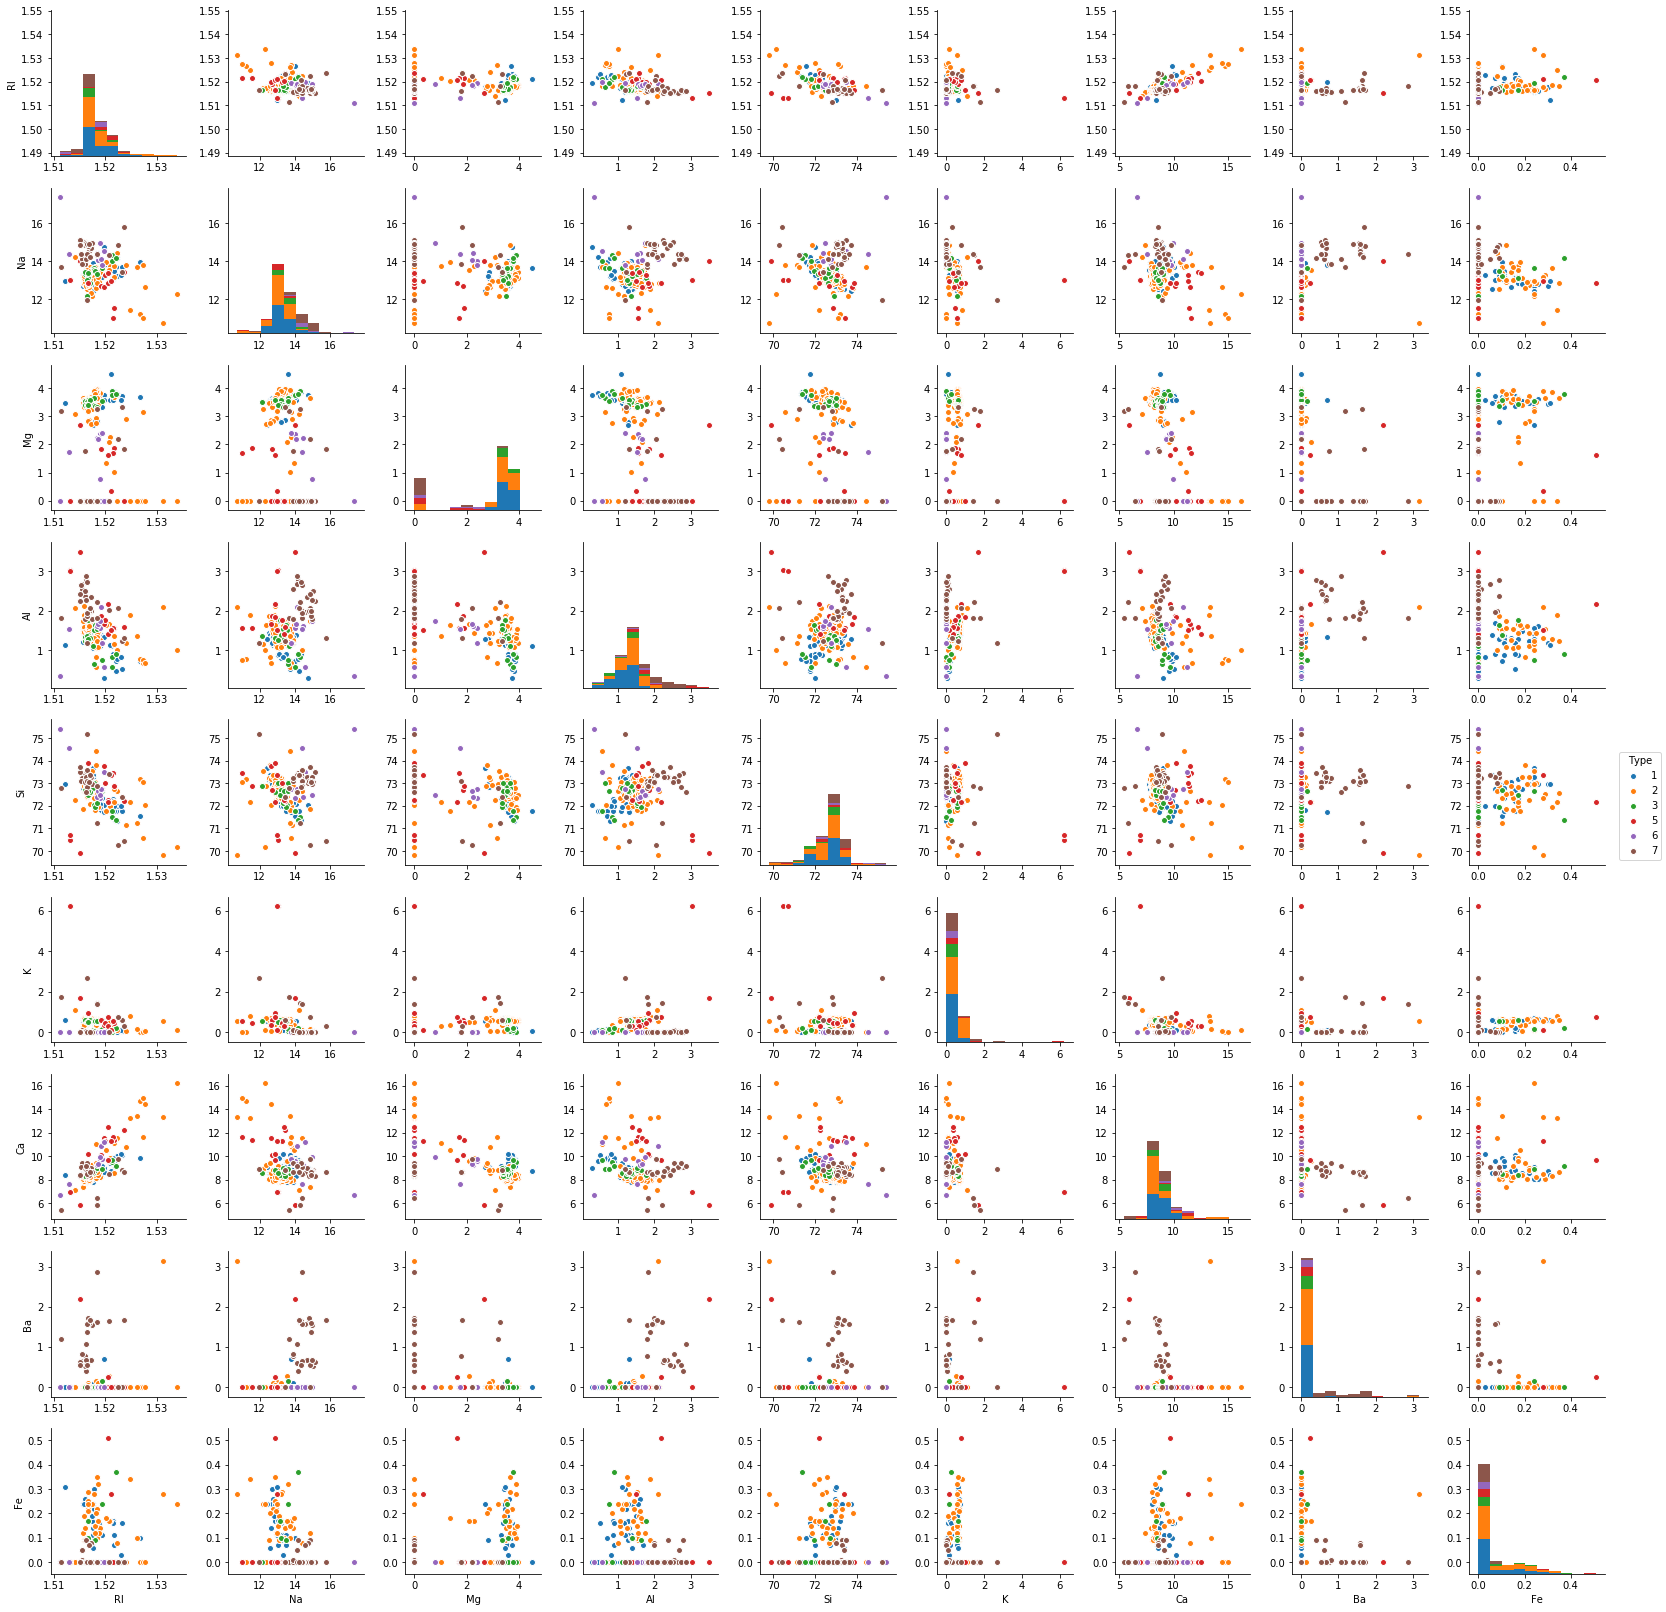

In [59]:
sns.pairplot(df, vars=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], hue="Type")
plt.show()

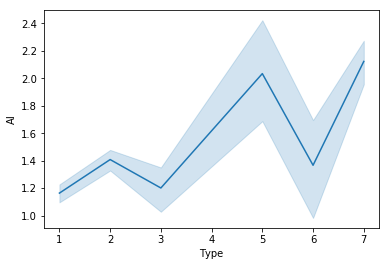

In [5]:
# conda install -c anaconda seaborn=0.9.0
sns.lineplot(x = 'Type', y = 'Al', data = df)

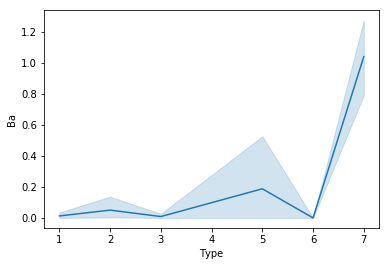

In [6]:
sns.lineplot(x = 'Type', y = 'Ba', data = df)

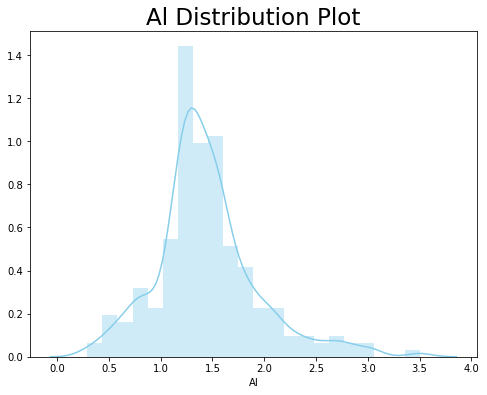

In [7]:
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Al Distribution Plot',fontsize=23)
sns.distplot(df['Al'], color='skyblue')

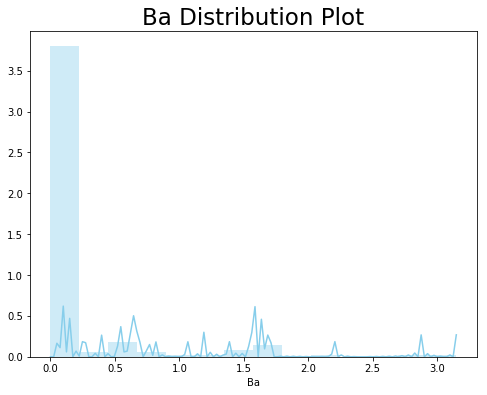

In [8]:
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Ba Distribution Plot',fontsize=23)
sns.distplot(df['Ba'], color='skyblue')

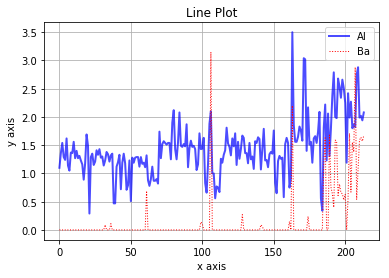

In [9]:
df.Al.plot(kind="line", color='b' ,label="Al",linewidth=2 ,alpha=0.7,grid=True,linestyle="-" )
df.Ba.plot(color='r',label="Ba", linewidth=1, alpha=1 ,grid=True, linestyle=":")

plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

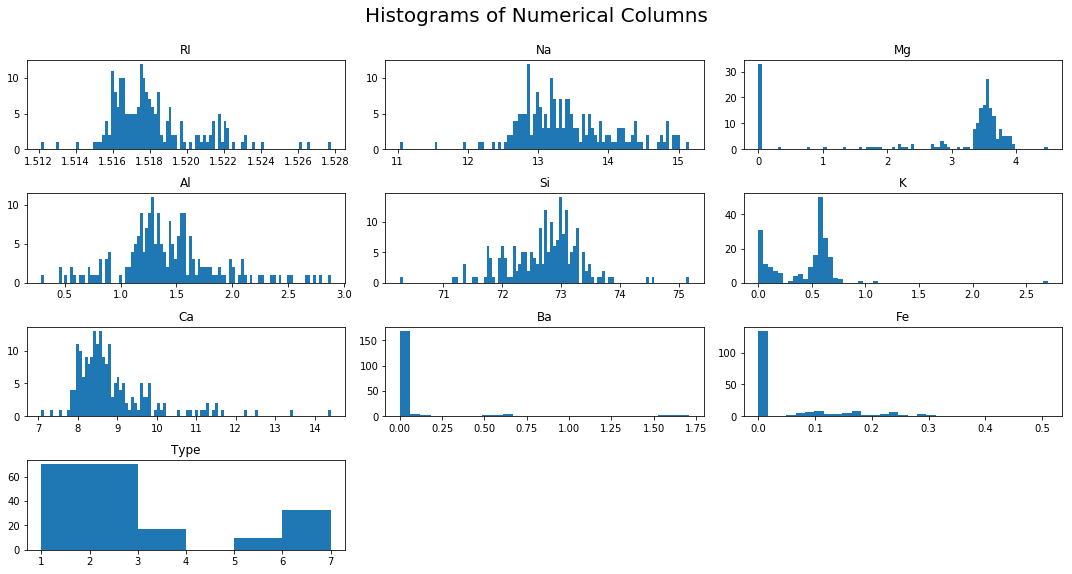

In [24]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df.iloc[:, i], bins=vals)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [25]:
# Detect observations with more than one outlier
from collections import Counter
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

In [26]:
features = df.columns[:-1].tolist()
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))

The dataset contains 19 observations with more than 2 outliers


In [27]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(181, 10)


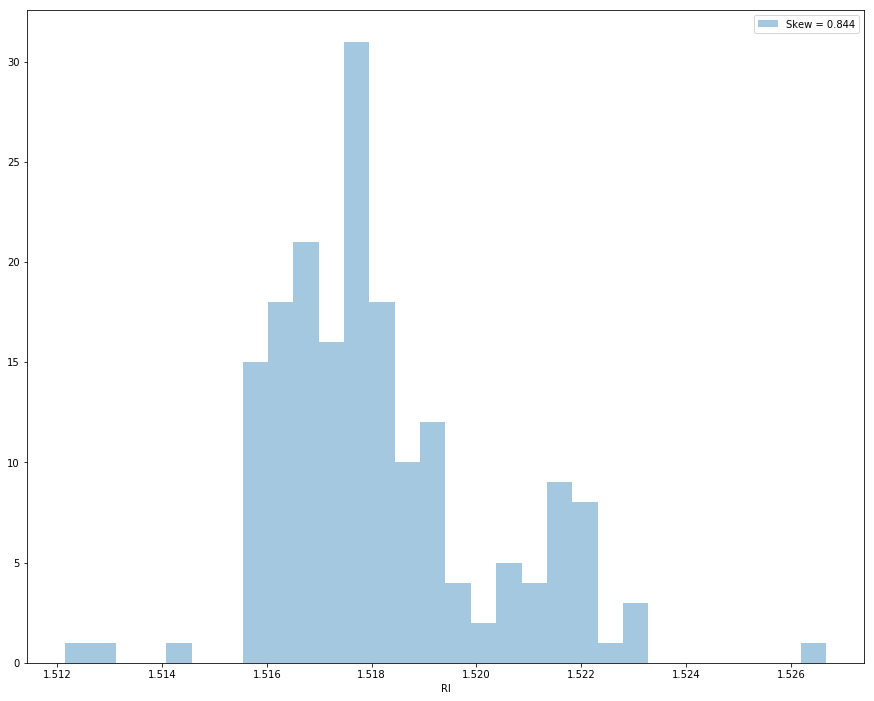

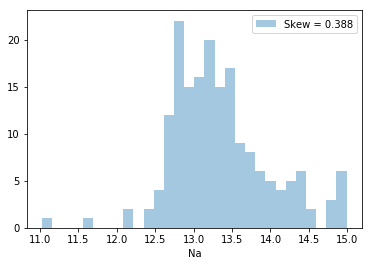

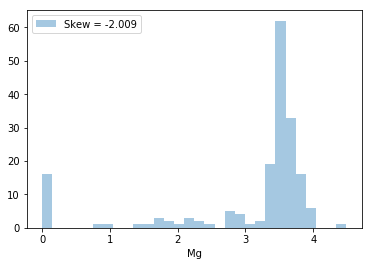

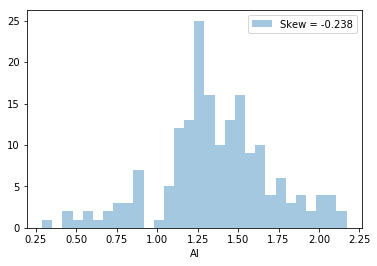

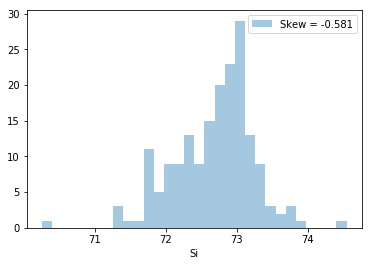

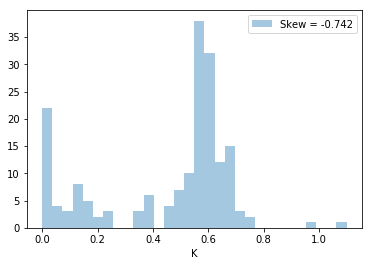

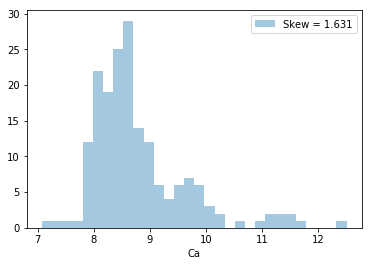

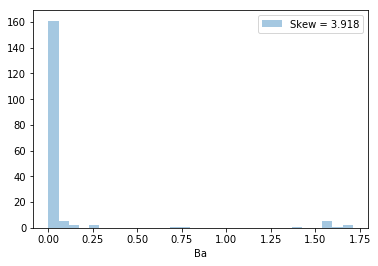

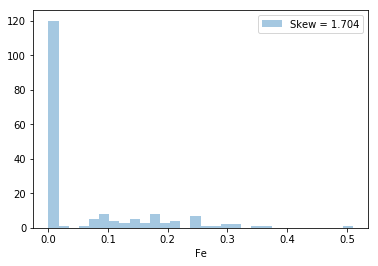

In [29]:
fig = plt.figure(figsize=(15, 12))

for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

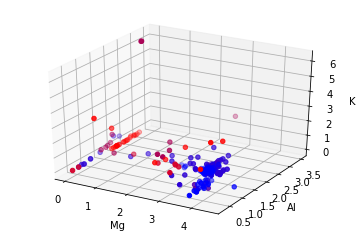

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for i in range(len(types)+1):
    count = i+1
    train_tempt = df.loc[df['Type'] == count]
    x = train_tempt['Mg']
    y = train_tempt['Al']
    z = train_tempt['K']
    
    ax.scatter(x, y, z, c= [float(i)/float(len(types)), 0.0, 
                            float(len(types)-i)/float(len(types))], marker='o')
    
    ax.set_xlabel(str('Mg'))
    ax.set_ylabel(str('Al'))
    ax.set_zlabel(str('K')) 
plt.show()

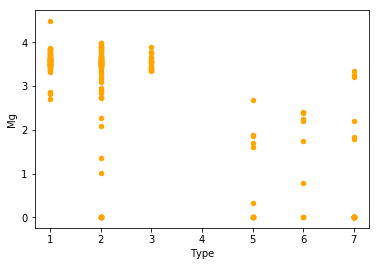

In [30]:
df.plot(kind="scatter",x="Type",y="Mg",color="orange")
plt.xlabel=("Type")
plt.ylabel=("Mg")
plt.show()

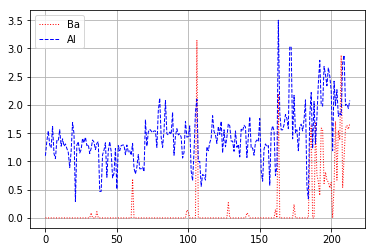

In [31]:
df.Ba.plot(kind="line",grid=True,color="red",linestyle=":",linewidth=1,label="Ba")
df.Al.plot(kind="line",grid=True,color="blue",linestyle="--",linewidth=1,label="Al")
plt.xlabel=("Samples")
plt.ylabel=("Values")
plt.legend(loc="upper left")
plt.show()

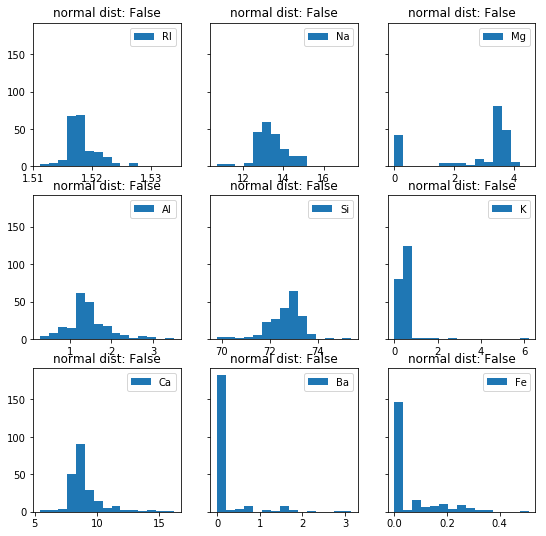

In [36]:
from scipy.stats import pearsonr, spearmanr, kendalltau, shapiro, pointbiserialr

col_names, cn = df.columns, 0
fig, ax = plt.subplots(3, 3, sharey=True, figsize=(9,9))
for row in ax:
    for cell in row:
        cell.hist(df[col_names[cn]], label=col_names[cn], bins=15)
        norm = shapiro(df[col_names[cn]])[1]>0.05
        cell.set_title('normal dist: ' + str(norm))
        cell.legend()
        cn+=1

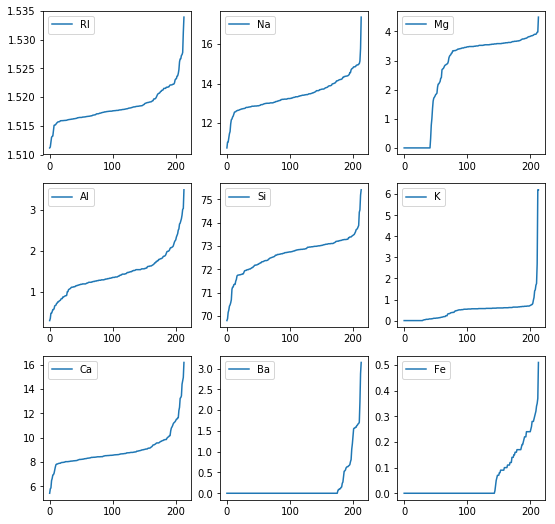

In [37]:
col_names, cn = df.columns, 0
fig, ax = plt.subplots(3, 3, figsize=(9,9))
for row in ax:
    for cell in row:
        sv = df[col_names[cn]].sort_values().tolist()
        cell.plot(sv, label=col_names[cn])
        cell.legend()
        cn+=1

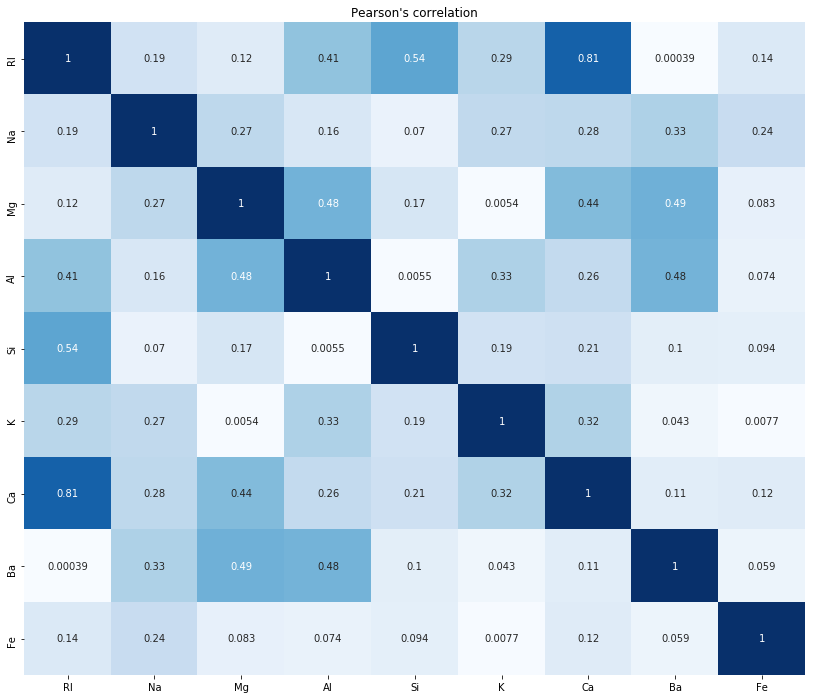

In [40]:
plt.figure(figsize=(14,12))
plt.title("Pearson's correlation")
sns.heatmap(abs(df.drop('Type', axis=1).corr(method='pearson')), cmap='Blues', annot=True, cbar=False)

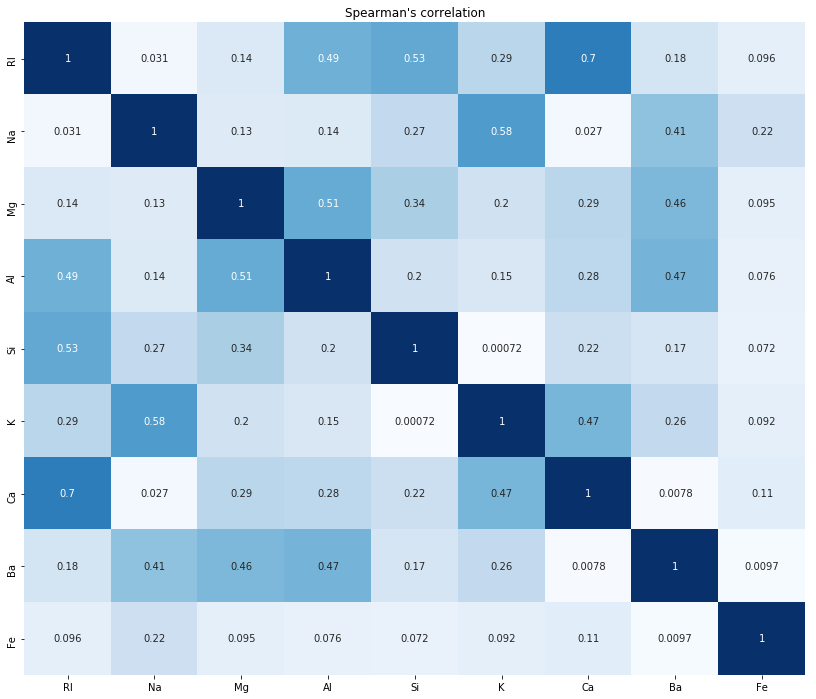

In [41]:
plt.figure(figsize=(14,12))
plt.title("Spearman's correlation")
sns.heatmap(abs(df.drop('Type', axis=1).corr(method='spearman')), cmap='Blues', annot=True, cbar=False)

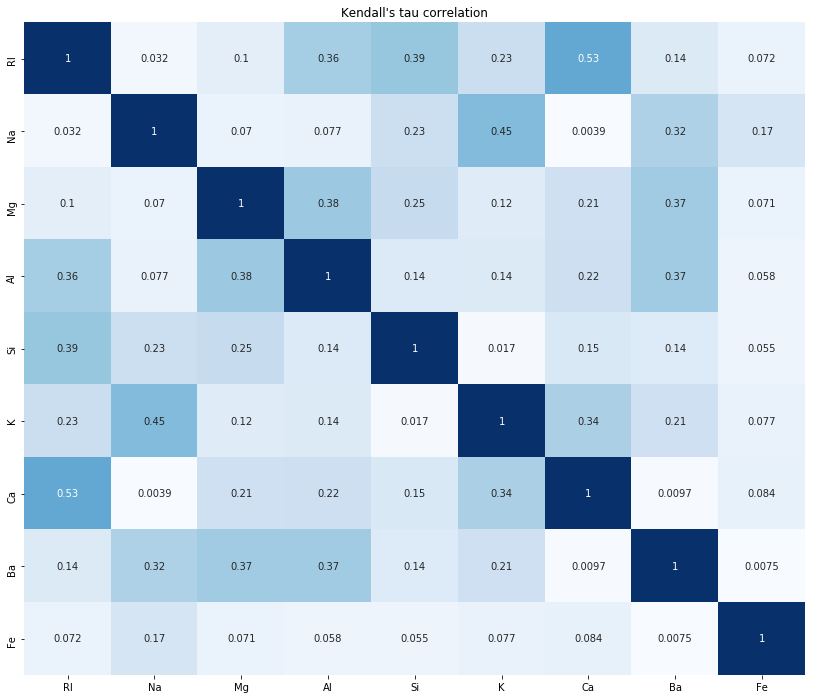

In [43]:
plt.figure(figsize=(14,12))
plt.title("Kendall's tau correlation")
sns.heatmap(abs(df.drop('Type', axis=1).corr(method='kendall')), cmap='Blues', annot=True, cbar=False)

In [44]:
def plot_colored(ax, X, Y, target):
    labels = target.unique()
    for c, l in zip("rgbcmykw",labels):
        ax.scatter(X[target == l], Y[target == l], c=c, alpha=0.6, s=100)

There is left 69.63 percent of data on the last scatter.
correlation between RI and Ca


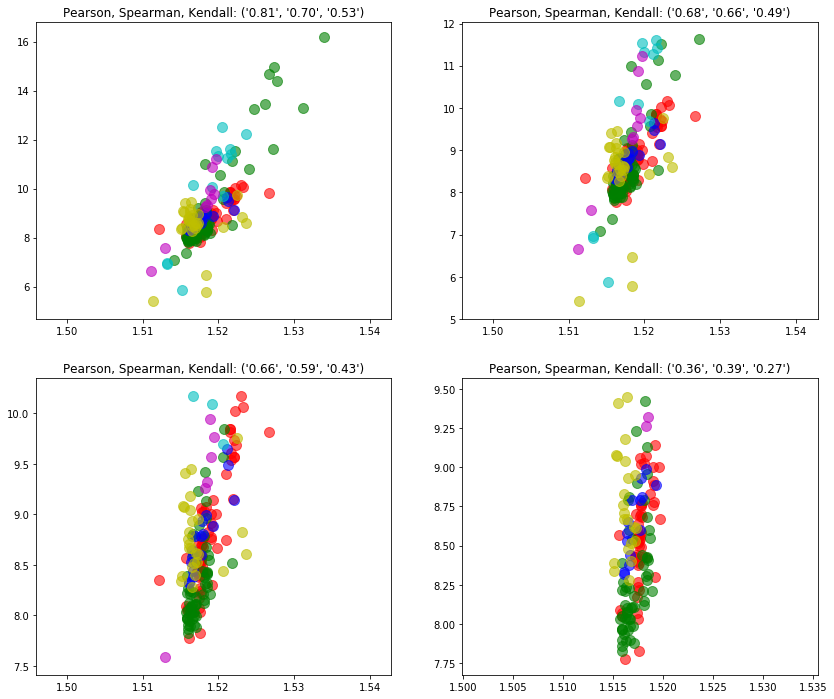

In [54]:
fig, ax = plt.subplots(2,2, figsize=(14,12))
plot_colored(ax[0,0], df.RI, df.Ca, df.Type)
ax[0,0].set_title(
    'Pearson, Spearman, Kendall: ' + str(('%.2f' % pearsonr(df.RI, df.Ca)[0], 
                       '%.2f' % spearmanr(df.RI, df.Ca)[0],
                       '%.2f' % kendalltau(df.RI, df.Ca)[0]))
    )

a, b = 12, 12
A, B = df.RI[df.Ca < a], df.Ca[df.Ca < b]
plot_colored(ax[0,1], A, B, df.Type)
ax[0,1].set_title(
    'Pearson, Spearman, Kendall: ' + str(('%.2f' % pearsonr(A,B)[0], 
                       '%.2f' % spearmanr(A,B)[0], 
                       '%.2f' % kendalltau(A,B)[0]))
    )


a, b = 7.5, 10.5
A = df.RI[(df.Ca > a) & (df.Ca < b)]
B = df.Ca[(df.Ca > a) & (df.Ca < b)]
plot_colored(ax[1,0], A, B, df.Type)
ax[1,0].set_title(
    'Pearson, Spearman, Kendall: ' + str(('%.2f' % pearsonr(A,B)[0], 
                       '%.2f' % spearmanr(A,B)[0], 
                       '%.2f' % kendalltau(A,B)[0]))
    )


a, b = 7.6, 9.5
A = df.RI[(df.Ca > a) & (df.Ca < b) & (df.RI >1.515) & (df.RI < 1.52)]
B = df.Ca[(df.Ca > a) & (df.Ca < b) & (df.RI >1.515) & (df.RI < 1.52)]
plot_colored(ax[1,1], A, B, df.Type)
ax[1,1].set_title(
    'Pearson, Spearman, Kendall: ' + str(('%.2f' % pearsonr(A,B)[0], 
                       '%.2f' % spearmanr(A,B)[0], 
                       '%.2f' % kendalltau(A,B)[0]))
    )

print( 'There is left %.2f percent of data on the last scatter.' % (100.*A.shape[0]/df.shape[0]))
print("correlation between RI and Ca")

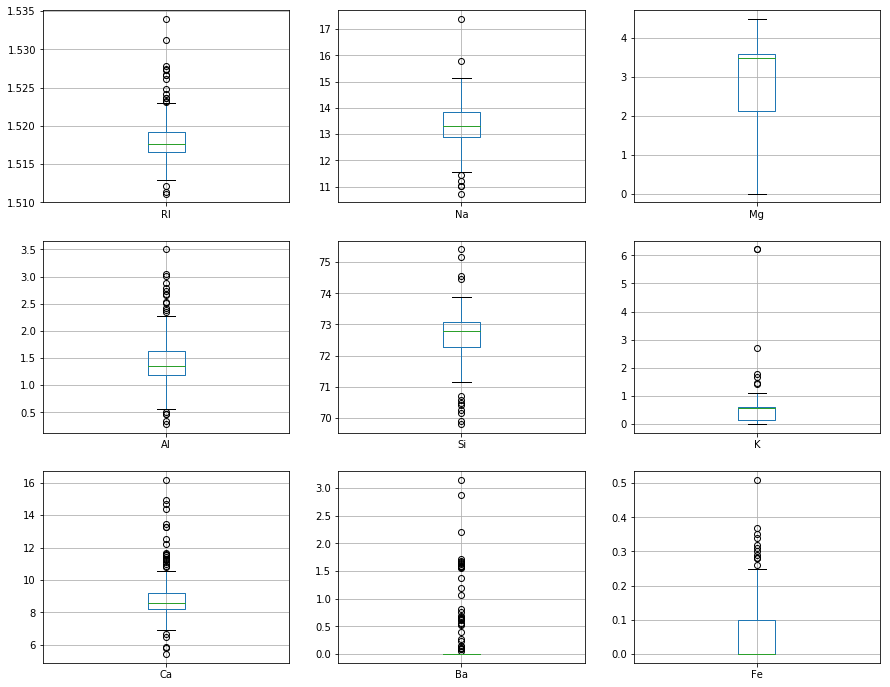

In [63]:
X = df.drop("Type", axis = 1)

chartlocation = 0
plt.figure(figsize=(15,12))
columns = X.columns.values
for column in columns:
    chartlocation = chartlocation + 1
    plt.subplot(3,3,chartlocation)
    X.boxplot(column=column)

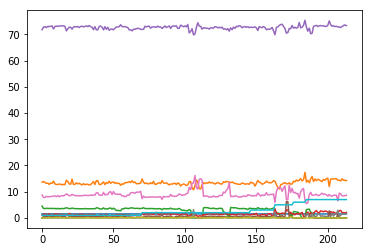

In [64]:
plt.plot(df)

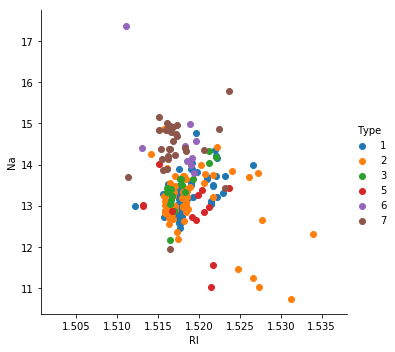

In [66]:
sns.FacetGrid(df, hue="Type", size=5).map(plt.scatter, "RI", "Na").add_legend()

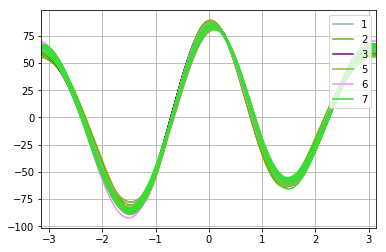

In [67]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(df, "Type")

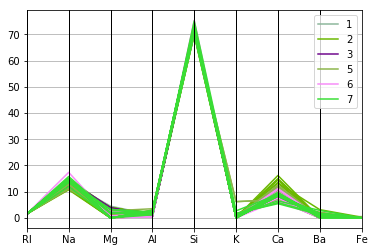

In [68]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, "Type")

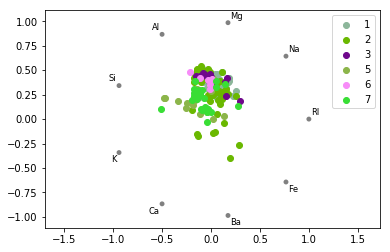

In [69]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(df, "Type")

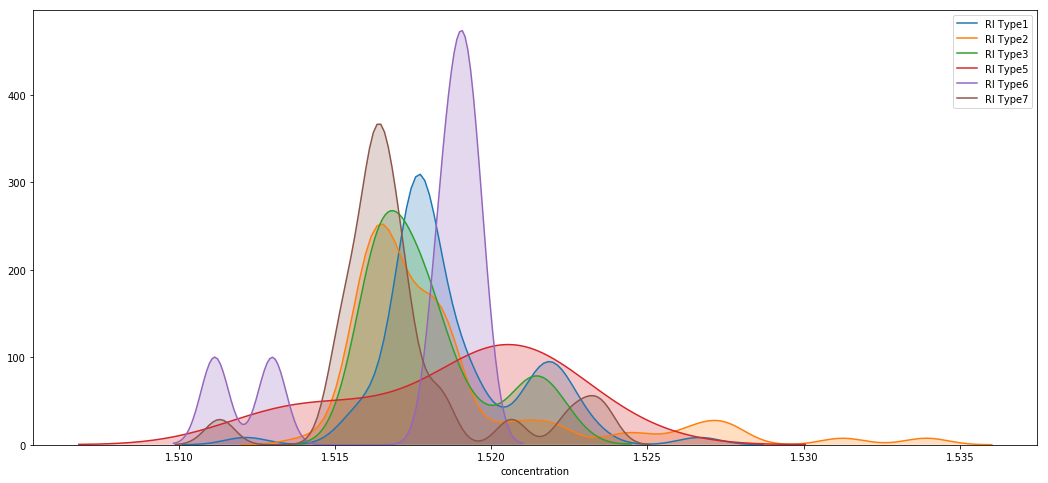

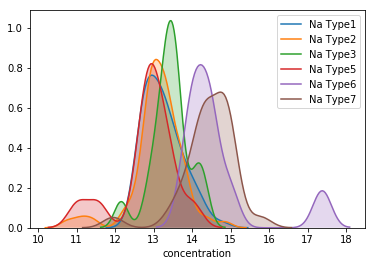

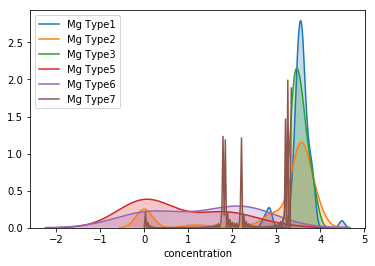

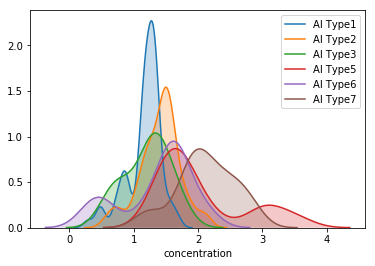

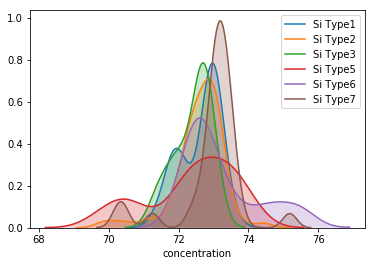

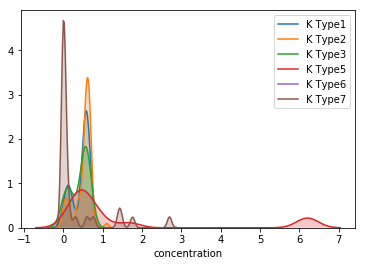

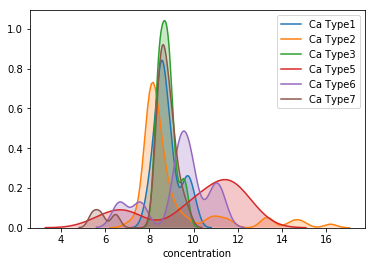

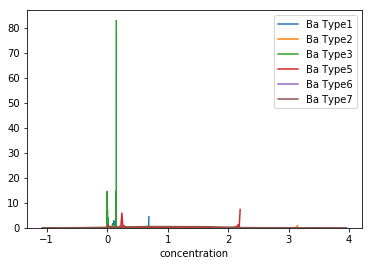

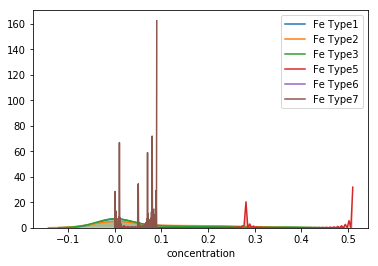

In [11]:
plt.figure(figsize=(18,8))

for feature in df.columns[:-1]:
    for j in range(1,9):
        try:
            sns.kdeplot(df[df["Type"]==j][feature],label=feature+" Type"+str(j),shade=True)
        except:
            pass
    plt.xlabel("concentration")
    plt.show()